#**TÊN ĐỀ TÀI: DieTanic**
**NHÓM 6**

**THÀNH VIÊN:**
- 1. Họ tên: Nguyễn Đỗ Khánh Ngọc - MSSV: 23280008
- 2. Họ tên: Thái Ngọc Thanh Mai - MSSV: 23280018
- 3. Họ tên: Đặng Trọng Bảo Thi - MSSV: 23280025
- 4. Họ tên: Nguyễn Ngọc Minh - MSSV: 23280029
- 5. Họ tên: Trịnh Quốc Thắng - MSSV: 23280009
- 6. Họ tên: Nguyễn Trang Thanh Trúc - MSSV: 23280011


# 🟢 1. Problem Definition (Xác định bài toán)

Vụ chìm tàu Titanic là một trong những vụ chìm tàu thảm khốc nhất trong lịch sử. Vào ngày 15 tháng 4 năm 1912, trong chuyến hành trình vượt Đại Tây Dương đầu tiên của tàu, Titanic đã chìm sau khi va chạm với một tảng băng, khiến 1502 trên 2224 hành khách và thủy thủ tàu thiệt mạng. Đây là lý do vì sao đề tài tên là DieTanic (Die + Titanic) và tập dataset nhóm em sử dụng là tập dataset Titanic nổi tiếng trong lĩnh vực khoa học dữ liệu để phân tích.

* Lĩnh vực: Xã hội, dự đoán rủi ro.
* Loại bài toán: Classification (phân loại).
* Mục tiêu: Dự đoán hành khách trên chuyến tàu Titanic có khả năng sống sót hay không.


**Cụ thể**: Xác định
- Problem: Dán nhãn hành khách là sống sót hay không (0 = Không, 1 = Có)
- Input: Các đặc tính như giới tính, hạng vé tàu, tuổi, cảng xuất phát,... của hành khách.
- Output: Biến *Survived* để xác định hành khách sống sót hay không.

# 🟢 2. Data Acquisition (Thu thập dữ liệu)



###Nguồn dữ liệu

Titanic - Machine Learning from Disaster. Kaggle. Truy cập tại: https://www.kaggle.com/competitions/titanic

Trong giới hạn của dự án, nhóm tập trung xây dựng mô hình dựa trên bộ dữ liệu huấn luyện (train.csv), không sử dụng dữ liệu test.csv và gender_submission.csv.

###Đọc dữ liệu

In [ ]:
# Import libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Install libary
!pip install gdown

In [ ]:
# Download data from google drive
import gdown
file_id = "1RKB2Il6Sq04wF8clyJQi0PPGL8OYnSPP"
train = "train.csv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", train, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1RKB2Il6Sq04wF8clyJQi0PPGL8OYnSPP
To: /content/train.csv
100%|██████████| 61.2k/61.2k [00:00<00:00, 52.3MB/s]


'train.csv'

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###Data Description (Mô tả dữ liệu)

1. **PassengerId**: Mã số của hành khách.
2. **Survived**: Biến target để classification.
3. **Pclass**: Hạng vé. (1 = 1st = Upper, 2 = 2nd = Middle, 3 = 3rd = Lower).
4. **Name**: Tên hành khách.
5. **Sex**: Giới tính. ('male', 'female')
6. **Age**: Tuổi. (Tuổi là phân số nếu nhỏ hơn 1. Nếu tuổi được ước tính, phải ở dạng xx.5)
7. **SibSp**: Số anh chị em hoặc vợ chồng trên tàu Titanic. (bao gồm anh, chị, em ruột hoặc anh chị em kế, không tính hôn phu, hôn thê, tình nhân)
8. **Parch**: Số cha mẹ hoặc con ruột hoặc con kế có trên tàu Titanic (không tính vú nuôi).
9. **Ticket**: Mã số vé.
10. **Fare**: Giá vé của hành khách.
11. **Cabin**: Số của cabin.
12. **Embarked**: Cảng xuất phát.  (Hành khách lên từ cảng nào, C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
df_copy = df.copy()

# 🟢 3. Data Exploration (Khám phá dữ liệu - EDA)

In [ ]:
# Chọn categorical features
categorical_data=df.select_dtypes(include= 'object')
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 5 categorical features: 

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [ ]:
# Chọn numerical features
numerical_data = df.select_dtypes(include='number')
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 7 numerical features: 

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


## 3.1. Categorical Features

In [ ]:
# Number of unique values in each categorical feature
unique_counts=categorical_data.nunique()

for index,i in enumerate(range(len(categorical_features)),start=1):
    print(index,"{a} has {b} unique values".format(a=categorical_features[i],b=unique_counts[i]))

1 Name has 891 unique values
2 Sex has 2 unique values
3 Ticket has 681 unique values
4 Cabin has 147 unique values
5 Embarked has 3 unique values


<ipython-input-9-c07e2c61afb3>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(index,"{a} has {b} unique values".format(a=categorical_features[i],b=unique_counts[i]))


In [ ]:
categorical_data.isnull().sum()

,0
Name,0
Sex,0
Ticket,0
Cabin,687
Embarked,2


In [ ]:
categorical_cols = [col for col in categorical_data.select_dtypes(include=['object']).columns if categorical_data[col].nunique() <= 20]
print("Identify categorical columns with 20 or fewer unique valuesc:", categorical_cols)

Identify categorical columns with 20 or fewer unique valuesc: ['Sex', 'Embarked']


In [ ]:
for col in categorical_cols:
    print(f"🔹 Column: {col}")
    print(categorical_data[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: Sex
Sex
male      577
female    314
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: Embarked
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64
--------------------------------------------------


### Cột *Name*

In [ ]:
categorical_data['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


**Remarks**: tên của khách hàng có chứa các danh xưng như Mr và Ms, có thể giúp rút ra thông tin về giới tính và có thể suy đoán độ tuổi.

**Next Action**: tạo cột mới *Honorific* chứa danh xưng được trích xuất từ cột *Name*.

In [ ]:
df_copy['Honorific'] = 0
for i in df_copy:
    df_copy['Honorific'] = df_copy.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
df_copy['Honorific']

,Honorific
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [ ]:
df_copy['Honorific'].value_counts()

,count
Honorific,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [ ]:
# Chỉnh sửa các giá trị viết sai trong cột Honorific
df_copy['Honorific'] = df_copy['Honorific'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'])

In [ ]:
df_copy['Honorific'].value_counts()

,count
Honorific,
Mr,529
Miss,186
Mrs,127
Master,40
Other,9


**Remarks**:


*   Mr: dùng để gọi nam giới trưởng thành, không phân biệt tình trạng hôn nhân.
*   Miss: dùng để gọi nữ giới chưa kết hôn, thường là phụ nữ trẻ hoặc trẻ em gái.
*   Mrs: dùng để gọi phụ nữ đã kết hôn.
*   Master: dùng để gọi trẻ em trai hoặc nam thiếu niên chưa trưởng thành.
*   Other: các danh xưng ít gặp khác (Jonkheer - quý tộc, Col - Đại tá và Rev - linh mục)



### Cột *Sex*

<Axes: xlabel='Sex', ylabel='count'>

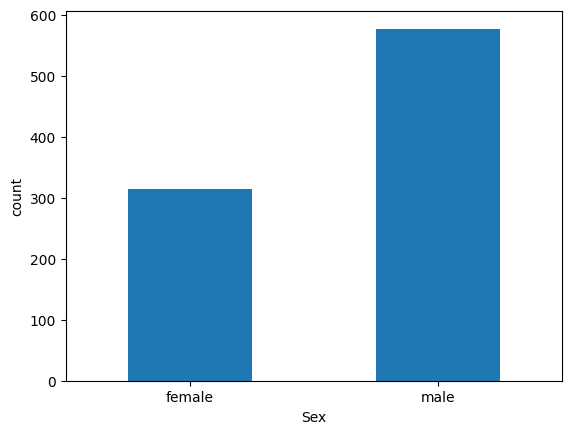

In [ ]:
categorical_data['Sex'].value_counts().sort_index().plot(kind='bar', rot=0, xlabel='Sex',ylabel='count')

**Remarks**: Số nam giới trên tàu nhiều gần gấp đôi nữ giới.

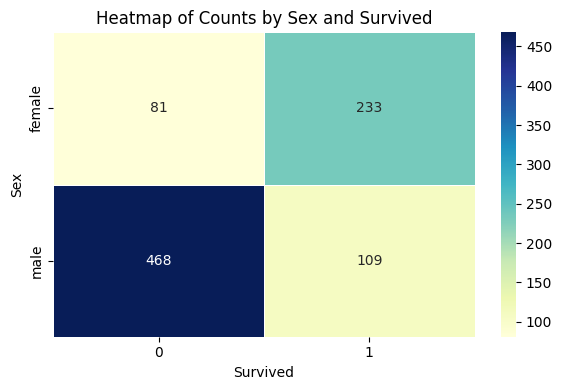

In [ ]:
# Heatmap thể hiện tính tương quan giữa Sex và biến target (Survived)
pivot_table = pd.crosstab(df_copy['Sex'], df_copy['Survived'])
pivot_table
plt.figure(figsize=(6,4))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)

plt.title('Heatmap of Counts by Sex and Survived')
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.tight_layout()
plt.show()

**Remarks**: Mặc dù nam giới chiếm đa số về số lượng, nhưng tỷ lệ sống sót lại hoàn toàn ngược lại: số nữ giới sống sót nhiều gấp hơn hai lần số nam giới sống sót, trong khi số nam tử vong cũng lớn hơn rất nhiều so với nữ. Điều này cho thấy giới tính là một yếu tố quan trọng ảnh hưởng đến khả năng sống sót, cụ thể là nữ giới có khả năng được ưu tiên cứu hộ hơn nam giới.

### Cột *Ticket*

In [ ]:
categorical_data['Ticket']

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


**Remarks**: tương tự với cột *Name*, cột này cũng không mang thông tin hữu ích cho quá trình mô hình hoá nên có thể loại bỏ khi xây dựng mô hình.

### Cột *Cabin*

In [ ]:
categorical_data['Cabin']

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
...,...
886,NaN
887,B42
888,NaN
889,C148


In [ ]:
# In những hàng có cột Cabin null
df[df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


**Remarks**: cột này có quá nhiều dữ liệu khuyết (687/891) và thông tin số cabin cũng không hỗ trợ mô hình hoá, nên có thể loại bỏ khi xây dựng mô hình.

### Cột *Embarked*

<Axes: xlabel='Embarked', ylabel='count'>

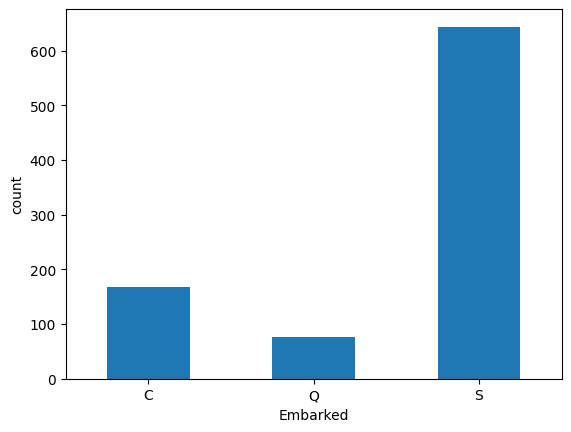

In [ ]:
categorical_data['Embarked'].value_counts().sort_index().plot(kind='bar', rot=0, xlabel='Embarked',ylabel='count')

**Remarks**: phần lớn hành khách xuất phát từ cảng S.

**Next Action**: thay thế giá trị khuyết của cột *Embarked* bằng mode ('S')

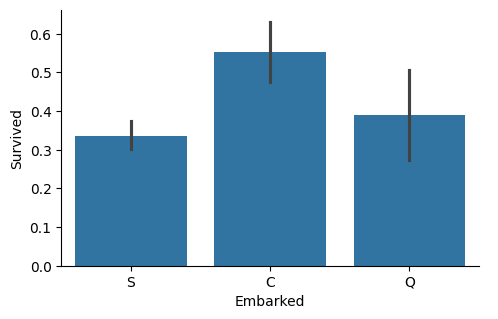

In [ ]:
# Kiểm tra tính tương quan của cột Embarked và biến target
sns.catplot(x='Embarked', y='Survived', data=df_copy, kind='bar')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

**Remarks**: tỷ lệ sống sót của những hành khách ở cảng C là cao nhất với khoảng 55%, thấp nhất ở cảng S với khoảng hơn 30%. Điều này cho thấy cảng xuất phát có thể ảnh hưởng đến khả năng sống sót.

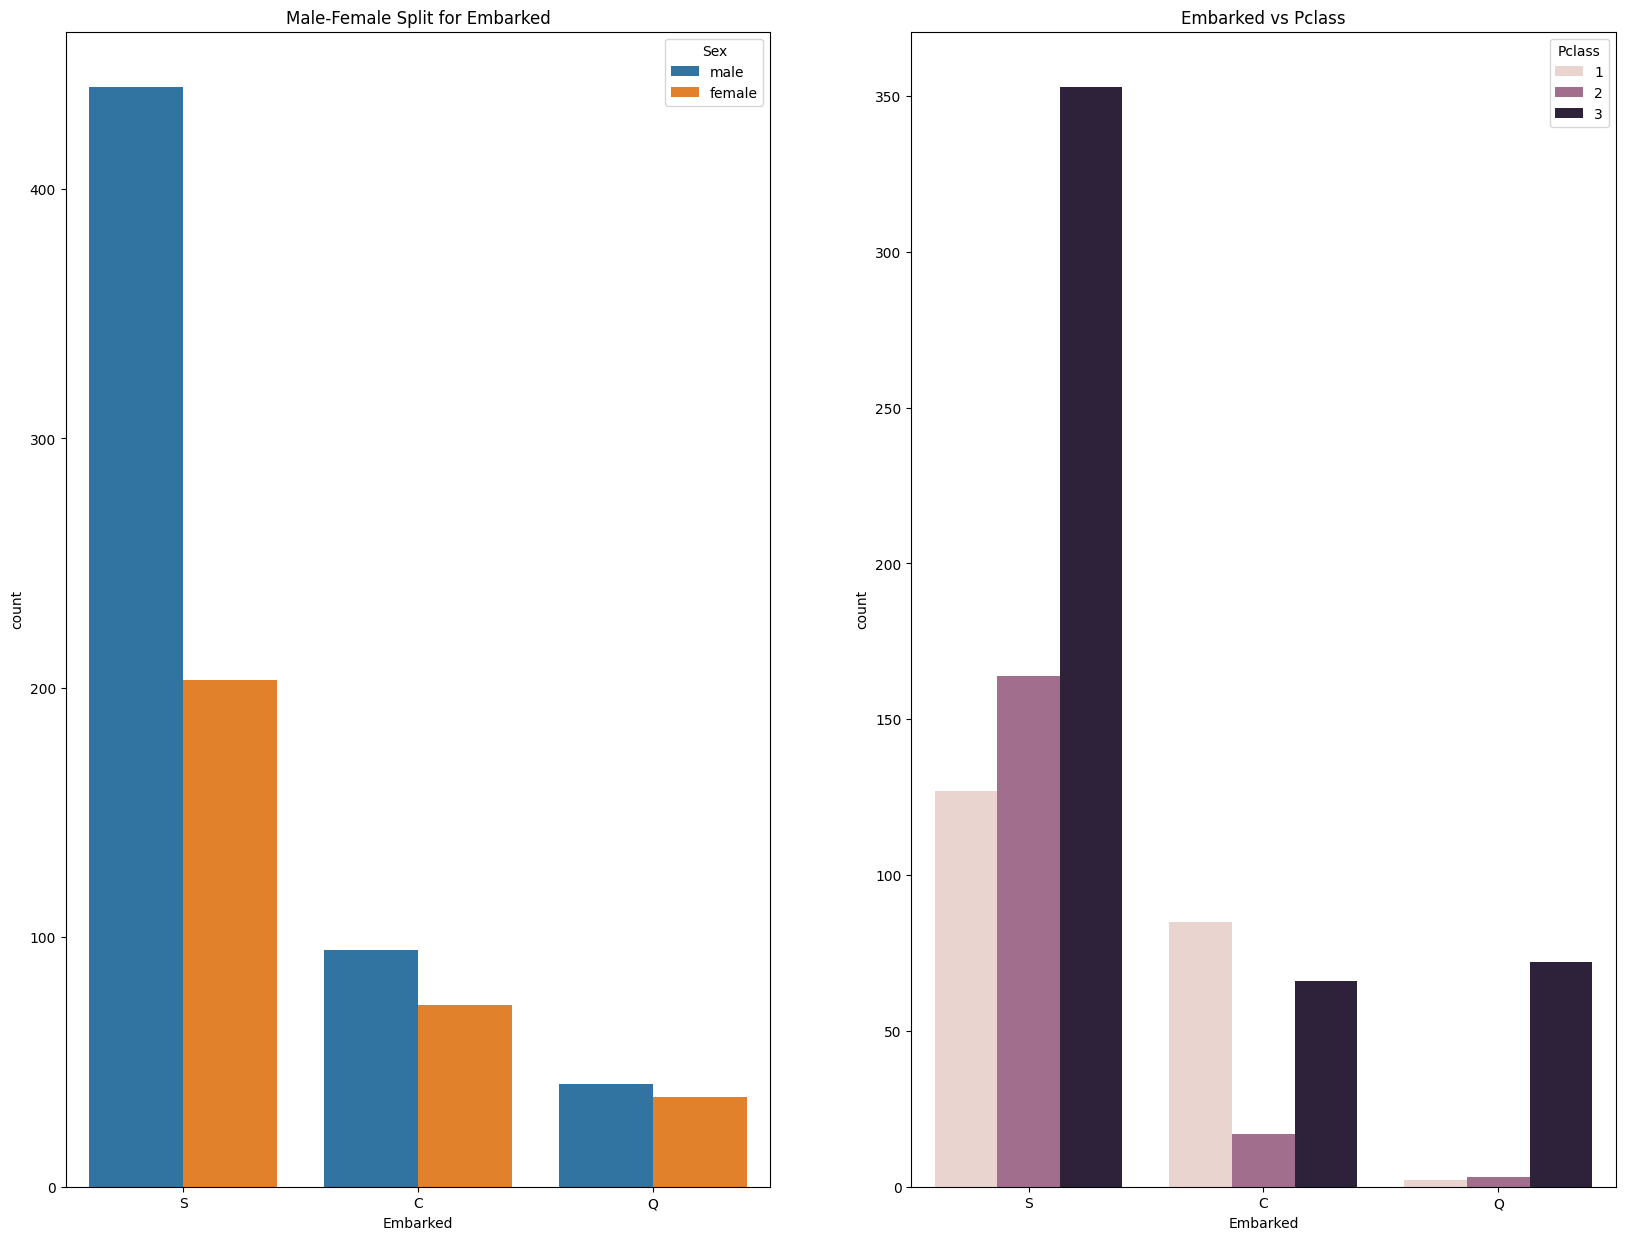

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,15))
sns.countplot(x='Embarked',hue='Sex',data=df_copy,ax=ax[0])
ax[0].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Pclass',data=df_copy,ax=ax[1])
ax[1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

**Remarks**:


*   Ở cả 3 cảng, số nam giới đều nhiều hơn nữ giới và số hành khách có hạng vé 3 đều nhiều nhất.
*   Hầu như mọi hành khách xuất phát từ cảng Q đều đi hạng vé 3.
*   Số người đi hạng vé 1 và 2 xuất phát từ cảng S là nhiều nhất.



## 3.2. Numerical Features

In [ ]:
# This table show basic statistics like mean, quantiles, Standard deviation about each numerical features
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
numerical_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Age,177
SibSp,0
Parch,0
Fare,0


### Cột *Survived* (Target)

In [ ]:
# Count values in Survived
df_copy['Survived'].value_counts()

,count
Survived,
0,549
1,342


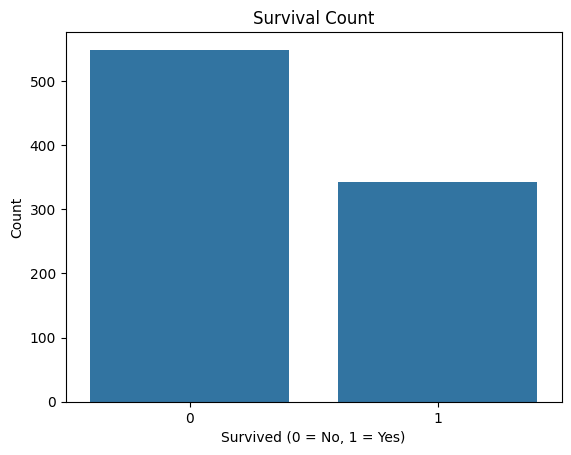

In [ ]:
sns.countplot(x='Survived', data=df_copy)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**Remarks**: Số người không sống sót cao hơn gấp rưỡi số người sống sót

### Cột *PassengerID*

In [ ]:
# Kiểm tra cột có missing values không
df_copy['PassengerId'].isnull().sum()

np.int64(0)

**Remark:** Cột này không mang thông tin hữu ích cho quá trình mô hình hóa, tuy nhiên có thể giữ lại để có thể đối chiếu hoặc join kết quả về sau.

### Cột *PClass*

In [ ]:
df_copy['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


*PClass* là biến thứ bậc (ordinal feature).

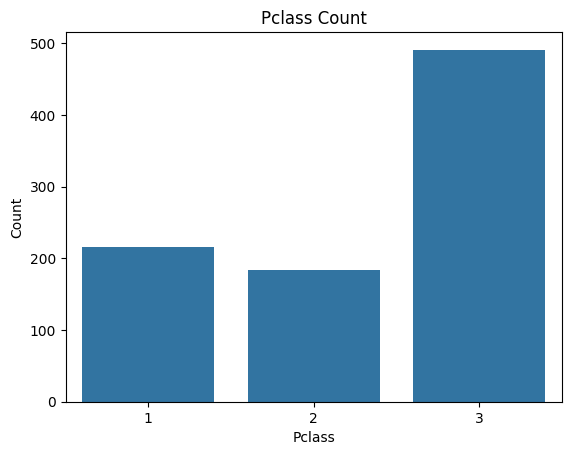

In [ ]:
# Barplot for PClass
sns.countplot(x='Pclass', data=df_copy)
plt.title('Pclass Count')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

**Remarks:** Số khách ở hạng vé 1 (Upper) và hạng vé 2 (Middle) xấp xỉ nhau trong khi số hành khách ở hạng vé 3 (Lower) chiếm ưu thế với số lượng nhiều hơn cả tổng của hai hạng còn lại.

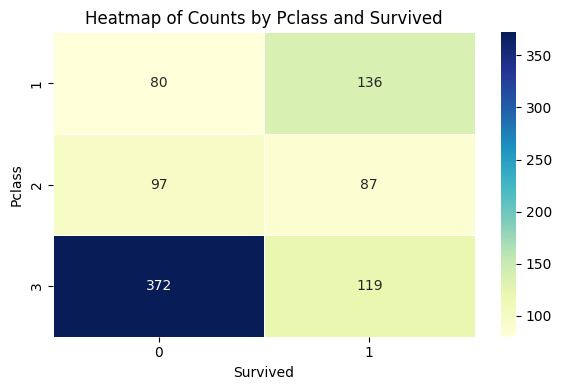

In [ ]:
# Heatmap thể hiện tính tương quan giữa PClass và biến target (Survived)
pivot_table = pd.crosstab(df_copy['Pclass'], df_copy['Survived'])
pivot_table
plt.figure(figsize=(6,4))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)

plt.title('Heatmap of Counts by Pclass and Survived')
plt.xlabel('Survived')
plt.ylabel('Pclass')
plt.tight_layout()
plt.show()

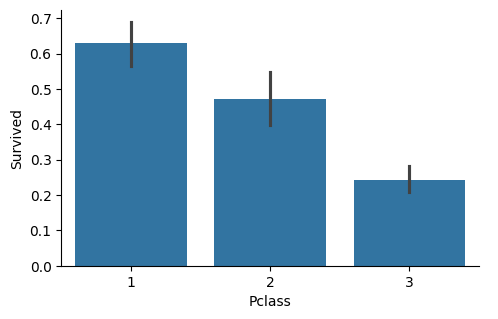

In [ ]:
sns.catplot(x='Pclass', y='Survived', data=df_copy, kind='bar')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

**Remarks**:
*   Tỉ lệ sống sót ở hạng vé 1 là cao nhất với khoảng 62%, tiếp theo đó là hạng vé  2 với khoảng 48% và cuối cùng là hạng 3 với khoảng 25%. Điều này cho thấy hạng vé là một yếu tố quan trọng ảnh hưởng đến khả năng sống sót, hạng vé càng cao cấp thì cơ hội sống sót càng cao.
*   Số người chết ở hạng vé 3 cực kỳ lớn, điều này đến từ số lượng hành khách hạng 3 rất lớn, dẫn đến thiệt hại nhân mạng cao.

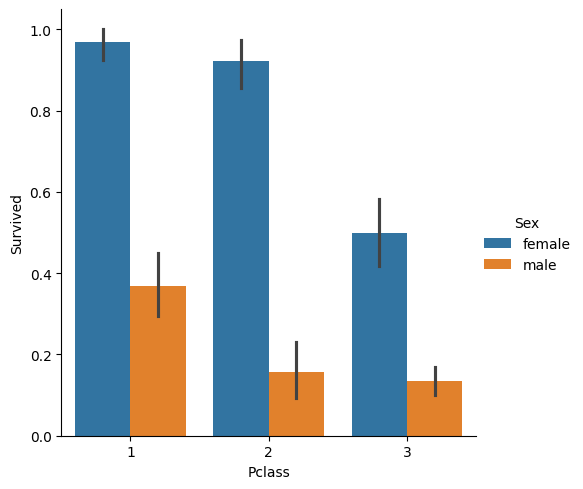

In [ ]:
# Kiểm tra tính tương quan giữa Pclass, Sex và Survived
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_copy, kind='bar')
plt.show()

**Remarks**:
*   Dù ở hạng vé nào, phụ nữ cũng có tỉ lệ sống sót cao hơn rõ rệt so với nam giới. Tuy nhiên, nếu thuộc hạng vé 3 thì khả năng sống sót của họ cũng bị giảm đáng kể, từ hơn 90% ở hạng vé 1 và 2 xuống khoảng 50%.
*   Tác động kép của *Sex* và *Pclass*: nếu là nữ, thì có lợi thế sống sót; nếu là nữ có hạng vé cao, gần như chắc chắn được cứu; ngược lại, nếu là nam ở hạng vé thấp, khả năng sống sót là thấp nhất với dưới 20%.

### Cột *Age*

In [ ]:
numerical_data['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


Ta có thể xử lý các giá trị khuyết trong cột *Age* dựa vào cột *Honorific*.

In [ ]:
# Tính giá trị tuổi trung bình của từng nhóm danh xưng
df_copy.groupby('Honorific')['Age'].mean()

,Age
Honorific,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


**Next Action**: thay thế các giá trị khuyết trong cột Age bằng giá trị tuổi trung bình của từng nhóm danh xưng.

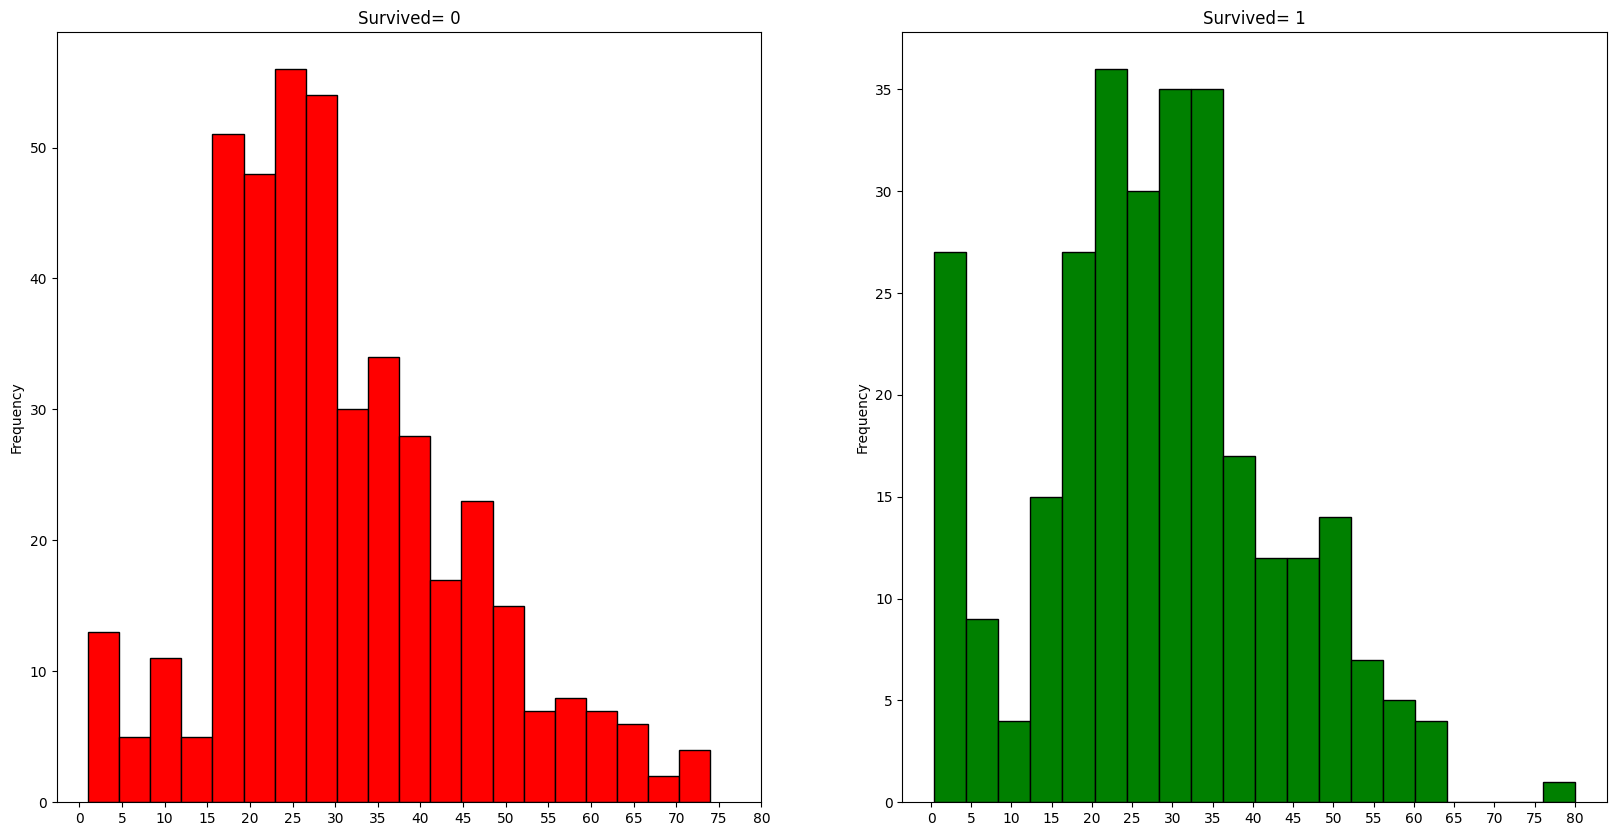

In [ ]:
# Kiểm tra tính tương quan giữa biến Age và biến Survived
f,ax=plt.subplots(1,2,figsize=(20,10))
df_copy[df_copy['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df_copy[df_copy['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

**Remarks**:

*   Trẻ em từ 0 - 10 tuổi có tỉ lệ sống sót cao hơn rõ rệt.
*   Người trên 60 tuổi có tỉ lệ sống sót thấp.

**Next Action**: Nên áp dụng kỹ thuật binning để phân nhóm tuổi, từ đó dễ dàng phân tích và mô hình hóa ảnh hưởng của từng nhóm tuổi đến tỷ lệ sống sót.

### Cột *SipSb*

In [ ]:
df_copy['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


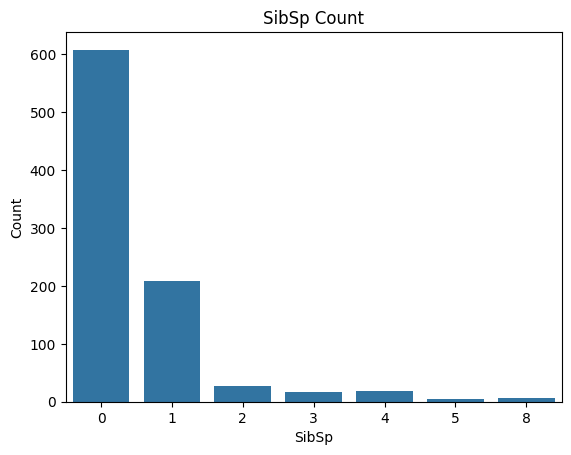

In [ ]:
# Plot for Sibsp
sns.countplot(x='SibSp', data=df_copy)
plt.title('SibSp Count')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

**Remarks**: Số người đi một mình chiếm phần lớn.

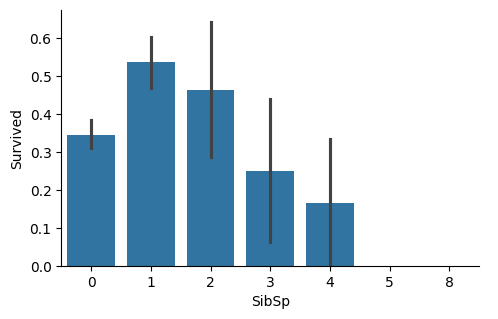

In [ ]:
# Kiểm tra sự tương quan của biến Sipsb so với biến target (Survived)
sns.catplot(x='SibSp', y='Survived', data=df_copy, kind='bar')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

**Remarks:** Những người đi một mình có tỉ lệ sống sót rơi vào khoảng 35%. Tỉ lệ sống sót tăng với những người có 1 Sibsp (khoảng 55%), sau đó giảm dần. Điều này thể hiện rằng số anh chị em, hoặc vợ/chồng đi cũng cũng là một nhân tố có thể ảnh hưởng đến khả năng sống sót.

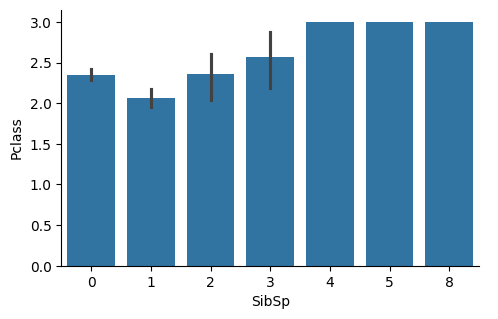

In [ ]:
# Kiểm tra sự tương quan của biến Sipsb và biến Pclass
sns.catplot(x='SibSp', y='Pclass', data=df_copy, kind='bar')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

**Remarks:** Những hành khách đi cùng từ 4 người thân trở lên đều ngồi ở hạng vé 3 - đã được dự đoán là hạng vé có tỉ lệ sống sót thấp nhất.

### Cột *Parch*

In [ ]:
# Count distinct value
df_copy['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


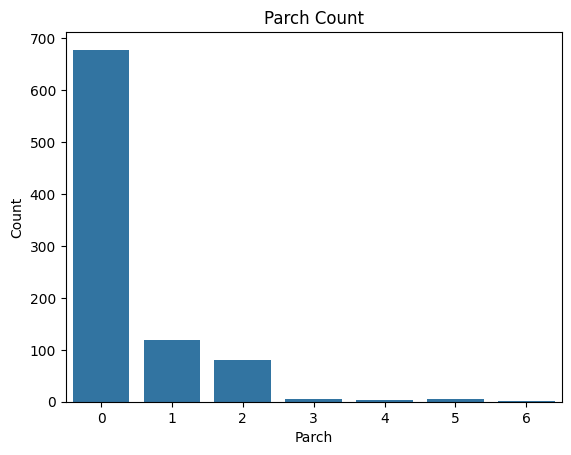

In [ ]:
# Plot for Parch
sns.countplot(x='Parch', data=df_copy)
plt.title('Parch Count')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.show()

**Remarks:** Những người đi một mình vẫn chiếm đa số.

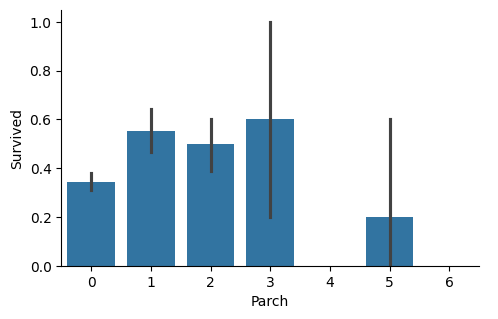

In [ ]:
# Kiểm tra sự tương quan giữa biến Parch và biến target (Survived)
sns.catplot(x='Parch', y='Survived', data=df_copy, kind='bar')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

**Remarks:** Tương tự với Sipsb, những người
có từ 1-3 parch đi cùng có tỉ lệ sống sót cao hơn so với đi một mình, tuy nhiên tỉ lệ giảm khi số parch tăng lên.

In [ ]:
pd.crosstab(df_copy.Parch,df_copy.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


**Remarks:** tương tự như Sibsp, những gia đình đông người cũng nằm ở hạng vé 3.

**==> Next Action**: Cả hai biến *SibSp* và *Parch* đều phản ánh số lượng người thân đi cùng hành khách trên tàu, cũng như có mối tương quan tương tự đến khả năng sống sót (*Survived*) và hạng vé (*Pclass*). Cụ thể, qua phân tích tương quan, chúng ta thấy rằng đi cùng khoảng 1-2 người thân thì khả năng sống sót cao hơn đi một mình, tuy nhiên số lượng thành viên gia đình càng lớn thì tỷ lệ sống sót của hành khách có xu hướng giảm, đồng thời những hành khách có gia đình đông người thường thuộc nhóm hành khách mua vé hạng 3. Vì vậy, có thể gộp 2 feature này thành 1 biến tổng hợp *Family_Size*.

### Cột *Fare*

In [ ]:
df_copy['Fare']

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


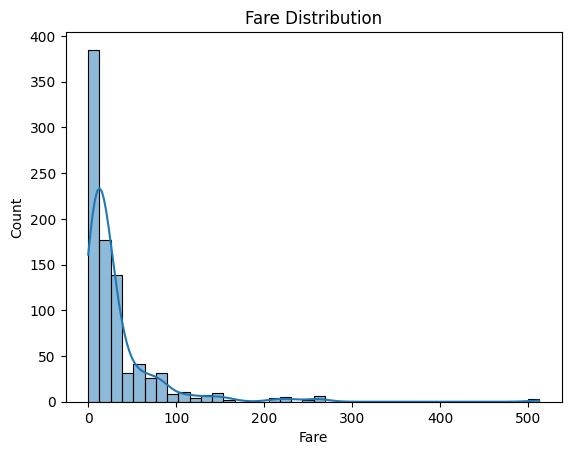

In [ ]:
# Kiểm tra phân phối của biến Fare
sns.histplot(df_copy['Fare'], bins=40, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

**Remarks:** Ta có thể thấy dữ liệu bị lệch phải rất nhiều, cho thấy rất nhiều người mua vé rẻ và một số ít người mua vé rất đắt.

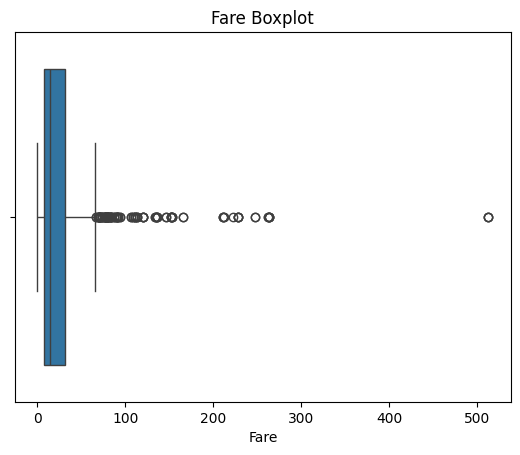

In [ ]:
sns.boxplot(x=df_copy['Fare'])
plt.title('Fare Boxplot')
plt.show()

**Remarks:** Ta thấy rằng phần lớn giá vé dao động quanh mức 30, tuy nhiên vẫn tồn tại một số trường hợp chi trả mức vé rất cao, tạo nên các giá trị ngoại lai (outliers) và khiến phân phối của Fare bị lệch phải. Loại bỏ outliers đồng nghĩa với việc loại bỏ những thông tin quan trọng liên quan đến phân tầng xã hội và khả năng sống sót của hành khách — bởi vì những người trả giá vé cao thường thuộc hạng vé cao và có tỷ lệ sống sót cao hơn. Hơn nữa, do tập dữ liệu Titanic chỉ gồm 891 dòng, việc loại bỏ thêm dữ liệu có thể gây mất mát đáng kể. Do đó, thay vì loại bỏ outliers, ta có thể áp dụng kỹ thuật binning để phân loại Fare thành các nhóm, giúp mô hình dễ học hơn mà vẫn giữ được thông tin quan trọng.



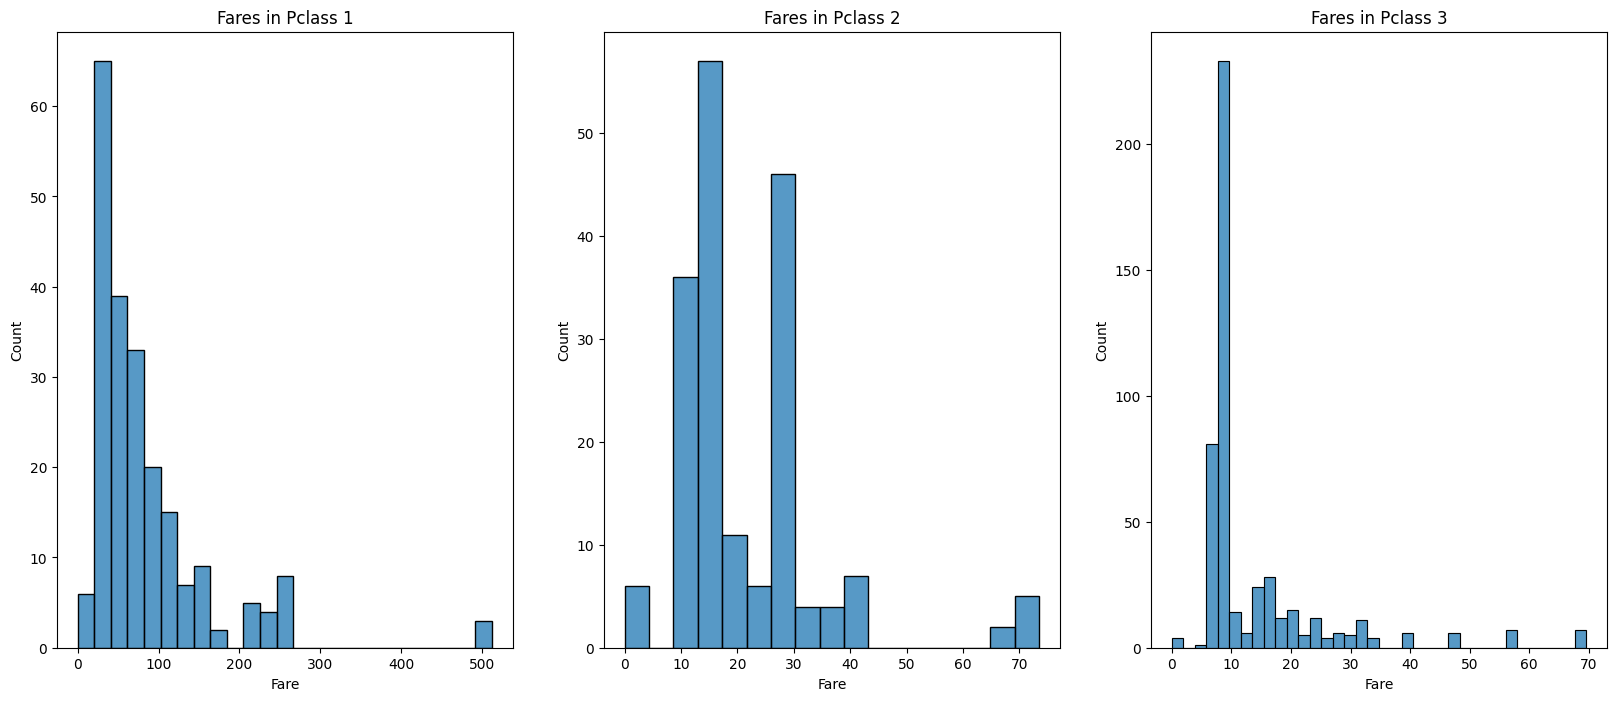

In [ ]:
# Kiểm tra tương quan của Fare và Pclass
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.histplot(df[df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.histplot(df[df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.histplot(df[df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

**Remarks**:


*   Giá vé trung bình của các hạng vé giảm dần, cao nhất là hạng vé 1, thấp nhất là hạng vé 3.
*   Hạng vé 1 có giá vé đa dạng, trải rộng từ 0-500.



**Next Action**: dùng kỹ thuật binning để phân nhóm giá vé, dễ dàng cho phân tích và mô hình hoá.

## 3.3. Correlation Analysis (Phân tích tương quan)



In [ ]:
# Ma trận tương quan của toàn bộ tập dữ liệu
# Tạo hệ số tương quan giữa từng đặc điểm
from pandas import set_option

# Set display precision
# Set the precision for float display
set_option('display.float_format', '{:,.3f}'.format)

# Thực hiện trên các cột số

# Tính ma trận tương quan
correlation = numerical_data.corr(method='pearson')

# Biểu diễn ma trận tương quan
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000,-0.005,-0.035,0.037,-0.058,-0.002,0.013
Survived,-0.005,1.000,-0.338,-0.077,-0.035,0.082,0.257
Pclass,-0.035,-0.338,1.000,-0.369,0.083,0.018,-0.549
Age,0.037,-0.077,-0.369,1.000,-0.308,-0.189,0.096
SibSp,-0.058,-0.035,0.083,-0.308,1.000,0.415,0.160
Parch,-0.002,0.082,0.018,-0.189,0.415,1.000,0.216
Fare,0.013,0.257,-0.549,0.096,0.160,0.216,1.000


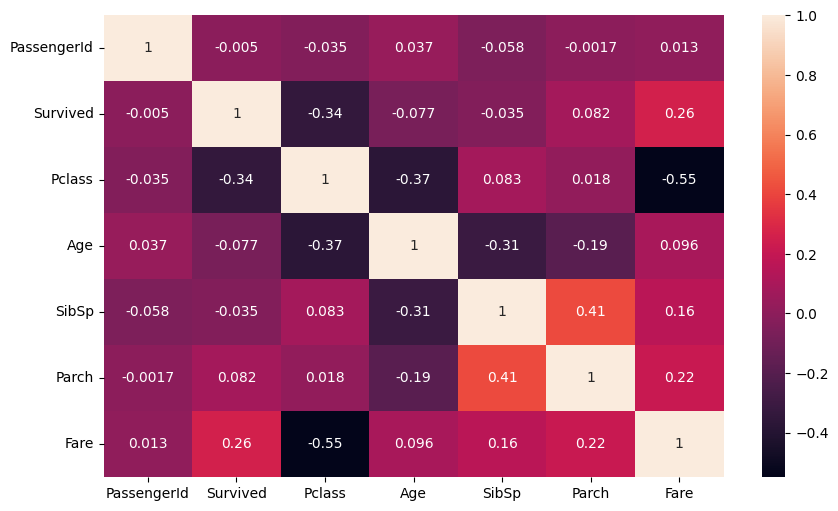

In [ ]:
# Plot correlation matrix in heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), ax=ax, annot=True)
plt.show()

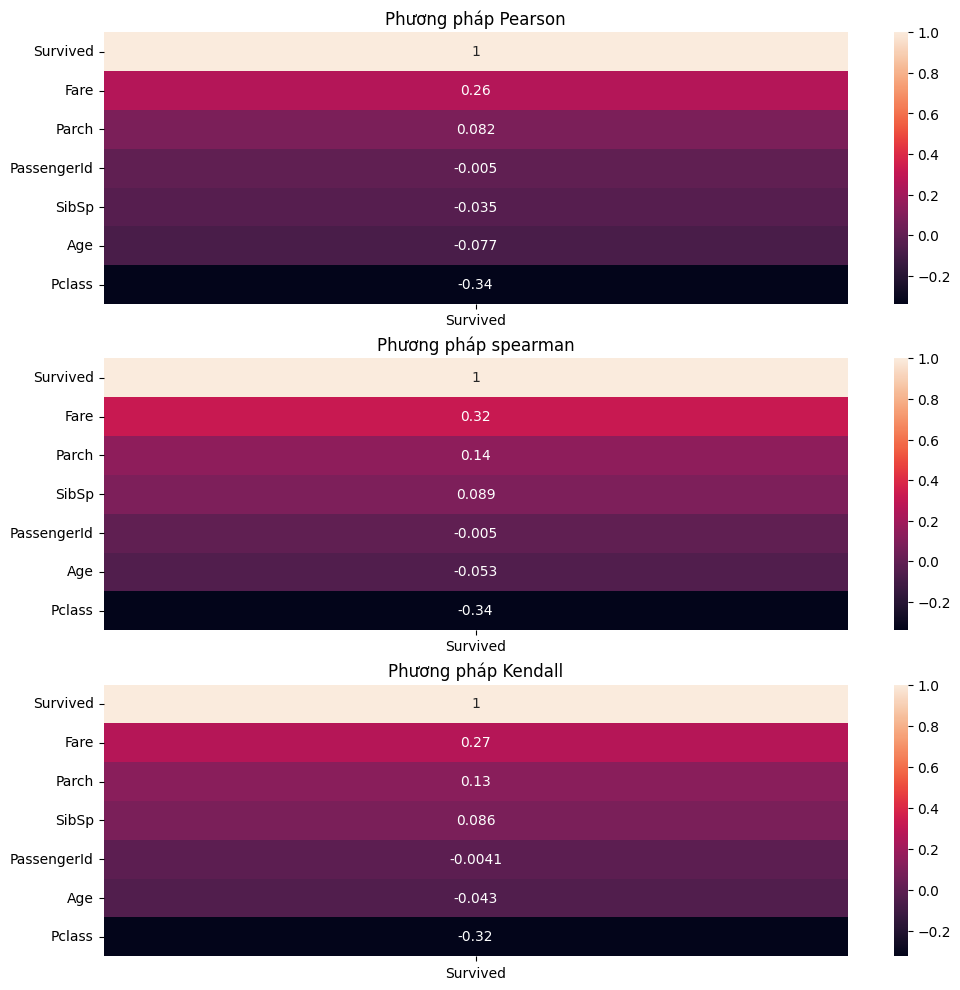

In [ ]:
# Biểu đồ tương quan giữa các thuộc tính số và mục tiêu
fig, ax = plt.subplots(3,1, figsize=(12, 12))
## Hệ số tương quan sử dụng các phương pháp khác nhau
corr1 = numerical_data.corr('pearson')[['Survived']].sort_values(by='Survived', ascending=False)
corr2 = numerical_data.corr('spearman')[['Survived']].sort_values(by='Survived', ascending=False)
corr3 = numerical_data.corr('kendall')[['Survived']].sort_values(by='Survived', ascending=False)

# Đặt tiêu đề cho từng biểu đồ
ax[0].set_title('Phương pháp Pearson')
ax[1].set_title('Phương pháp spearman')
ax[2].set_title('Phương pháp Kendall')
## Tạo bản đồ nhiệt
sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

**==>** **Remarks:**
*   *Fare* (giá vé) và *Pclass* (hạng vé) là các thuộc tính có sự tương quan lớn đối với tỉ lệ sống sót, trong đó giá vé có tương quan dương (người trả tiền nhiều hơn có tỉ lệ sống sót cao hơn) và hạng vé có tương quan âm (vé hạng càng thấp có tỉ lệ sống sót thấp hơn).
*   *Sex* (giới tính): nữ giới có tỉ lệ sống sót cao hơn nam giới.
*   *Age* (tuổi): trẻ em có tỉ lệ sống sót cao.
*   *Embarked* (cảng xuất phát): mặc dù hạng vé 1 và 2 có tỉ lệ sống sót cao, thế nhưng tỉ lệ sống sót của những hành khách xuất phát từ cảng C lại cao hơn cảng S - nơi có số lượng hành khách đi hạng vé cao cấp nhiều nhất. Điều này có thể được lý giải bởi việc cảng S có đông hành khách nhất, do đó cũng có nhiều hành khách đi hạng vé 3 (được dự đoán là tỉ lệ sống sót thấp nhất) hơn cảng C.
*   *Parch* (số cha mẹ/con đi cùng) và *Sibsp* (số anh chị em/vợ chồng đi cùng): những hành khách có từ 1-2 anh chị em/vợ chồng và 1-3 cha mẹ/con có tỉ lệ sống sót cao hơn những khách đi một mình hoặc đi cùng gia đình quá đông.
*   Các thuộc tính còn lại có tương quan yếu, cho thấy có thể ảnh hưởng nhẹ đến khả năng sống sót nhưng không đáng kể.


**==> Next Action:**


*   Xử lý giá trị khuyết: Cần xử lý các giá trị thiếu ở cột *Embarked* và *Age* để đảm bảo dữ liệu đầy đủ trước khi huấn luyện mô hình.
*   Tạo đặc trưng mới (feature engineering): Có thể kết hợp hai thuộc tính *Parch* (cha mẹ/con) và *SibSp* (anh chị em/vợ/chồng) thành một đặc trưng duy nhất  phản ánh mối quan hệ gia đình và ảnh hưởng đến khả năng sống sót.
*   Rời rạc hóa (binning): Cột *Fare* và *Age* có thể được phân chia thành các khoảng (bins) để dễ mô hình hoá.






## 3.4. Kiểm tra tính mất cân bằng (imbalance) của dữ liệu

In [ ]:
class_counts=df_copy.groupby("Survived").size()

columns=['Survived','count','percentage']
survived=[0,1]
count=list()
percentage=list()

# Tính tỉ lệ phần trăm
for val in range(2):
    count.append(class_counts[val])
    percent=(class_counts[val]/105000)*100
    percentage.append(percent)

imbalance_df=pd.DataFrame(list(zip(survived,count,percentage)),columns=columns)
imbalance_df

,Survived,count,percentage
0,0,549,0.523
1,1,342,0.326


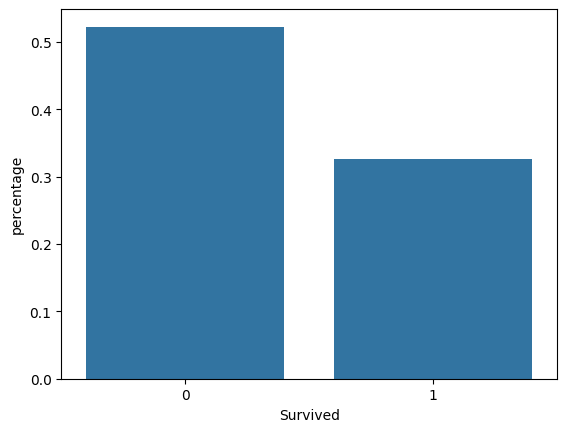

In [ ]:
sns.barplot(data=imbalance_df,x=imbalance_df['Survived'],y=imbalance_df['percentage'])
plt.show()

**Remarks**:


*   Dựa trên bảng phân phối, khoảng 52,3% mẫu có nhãn 0 và 32,6% mẫu có nhãn 1. Điều này cho thấy có sự mất cân bằng nhất định giữa hai lớp.
*   Do đó, nên sử dụng thêm các chỉ số đánh giá khác như precision, recall, và F1-score thay vì chỉ sử dụng chỉ số accuracy để đánh giá mô hình một cách toàn diện hơn và chính xác hơn.



# 🟢 4. Tiền xử lý dữ liệu (Data Preprocessing)

##Xử lí các giá trị khuyết (missing values)

In [ ]:
#Cột Age
df_copy[df_copy['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.000,NaN,S,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,NaN,C,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.225,NaN,C,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.879,NaN,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.229,NaN,C,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.550,NaN,S,Miss
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.500,NaN,S,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.896,NaN,S,Mr


In [ ]:
# Tính mean của Age được groupby Honorific
df_copy.groupby('Honorific')['Age'].mean()

,Age
Honorific,
Master,4.574
Miss,21.860
Mr,32.740
Mrs,35.982
Other,45.889


In [ ]:
#Thay thế các giá trị NaN trong cột Age bằng Mean của Age được groupby Honorific
df_copy.loc[(df_copy['Age'].isnull())&(df_copy['Honorific'] == 'Master'),'Age'] = 5
df_copy.loc[(df_copy['Age'].isnull())&(df_copy['Honorific'] == 'Miss'),'Age'] = 22
df_copy.loc[(df_copy['Age'].isnull())&(df_copy['Honorific'] == 'Mr'),'Age'] = 33
df_copy.loc[(df_copy['Age'].isnull())&(df_copy['Honorific'] == 'Mrs'),'Age'] = 36
df_copy.loc[(df_copy['Age'].isnull())&(df_copy['Honorific'] == 'Other'),'Age'] = 46

In [ ]:
#Double check
df_copy[df_copy['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific


In [ ]:
# Cột Cabin
df_copy[df_copy['Cabin'].isnull()]
# Do dữ liệu của Cabin chưa biết nên không thể thay bằng gì và cột Cabin cũng không có tác dụng cho việc xây dựng mô hình nên không cần phải xử lí.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,Mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,Miss
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,33.000,0,0,330877,8.458,NaN,Q,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S,Master
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000,0,0,SOTON/OQ 392076,7.050,NaN,S,Mr
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000,0,5,382652,29.125,NaN,Q,Mrs
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.000,NaN,S,Other
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.000,1,2,W./C. 6607,23.450,NaN,S,Miss


In [ ]:
# Cột Embarked
df_copy[df_copy['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
61,62,1,1,"Icard, Miss. Amelie",female,38.000,0,0,113572,80.000,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000,0,0,113572,80.000,B28,NaN,Mrs


In [ ]:
# Thay thế bằng giá trị của Cảng xuất phát có nhiều hành khách nhất
df_copy['Embarked'] = df_copy['Embarked'].fillna('S')

In [ ]:
# Double check
df_copy[df_copy['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific


## Tạo đặc trưng mới (Feature Engineering)

In [ ]:
# Gộp 2 cột SipSp và Parch thành 1 cột để thành 1 đặc trưng duy nhất phản ánh mối quan hệ gia đình và ảnh hưởng đến khả năng sống sót
df_copy['Family_Size'] = 0
df_copy['Family_Size'] = df_copy['SibSp'] + df_copy['Parch']
# Tạo thêm đặc trưng Alone để biểu thị hành khách có đi một mình hay không
df_copy['Alone'] = 0
df_copy.loc[df_copy.Family_Size == 0, 'Alone'] = 1

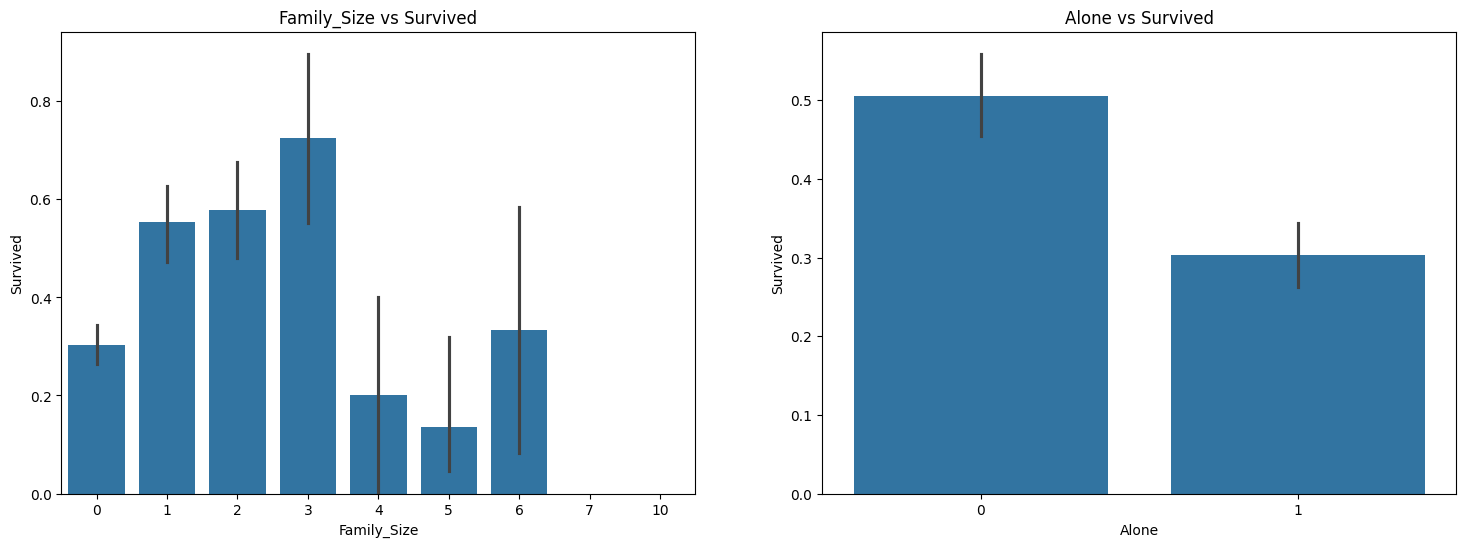

In [ ]:
# Tương quan giữa đặc trưng Family_Size và Alone với Survived
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.barplot(x='Family_Size',y='Survived', data=df_copy,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.barplot(x='Alone',y='Survived',data=df_copy,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.show()

**Remarks:**
- Nếu hành khách có *Family_Size* = 0 (hành khách đi một mình) có tỉ lệ sống sót khá thấp (khoảng 0.3), tỉ lệ tăng dần khi *Family_Size* tăng lên tới 3, nhưng *Family_Size* > 4 tỉ lệ càng giảm dần, khi *Family_Size* = 6 tỉ lệ lại tăng lên > 0.3.
- Còn với *Alone*, hành khách không đi một mình có tỉ lệ sống sót cao hơn đi một mình.

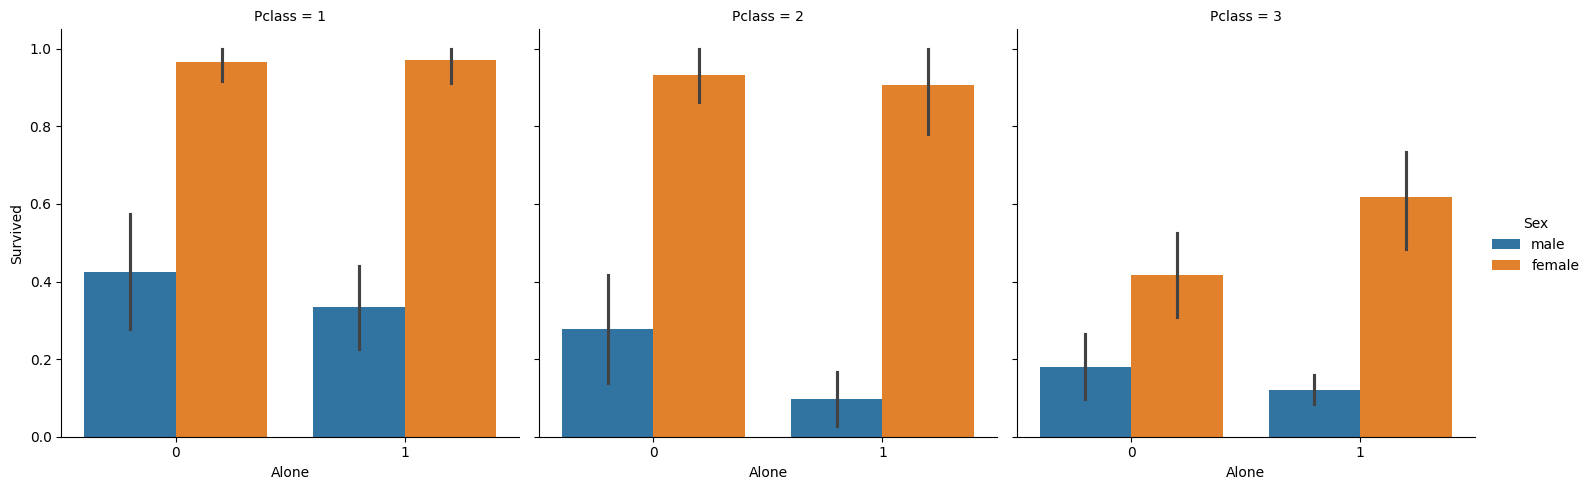

In [ ]:
# Tương quan giữa Alone với Survived thông qua Sex và PClass
sns.catplot( x='Alone', y='Survived',data = df_copy, hue='Sex', col='Pclass', kind='bar')
plt.show()

**Remarks:**
- Từ biểu đồ trên, ta thấy được việc đi một mình đều có tỉ lệ sống thấp hơn bất kể Giới tính (Sex) và Hạng vé (Pclass) nào. Ngoại trừ hạng Pclass = 3 ở giới tính nữ, đi một mình có tỉ lệ sống sót cao hơn và Pclass = 1 ở giới tính nữ, đi một mình có tỉ lệ sống sót xấp xỉ không đi một mình.


## Rời rạc hóa (binning)

In [ ]:
# Age_band
# Chia đặc trưng Age thành các khoảng nhỏ hơn để dễ mô hình hóa
# Do max của Age là 80 nên chia Age thành 5 khoảng, mỗi khoảng là 80/5 = 16
df_copy['Age'].max()

80.0

In [ ]:
# Tạo đặc trưng Age_band để chuyển Age thành giá trị phân loại
# Việc gán từng nhóm tuổi trong Age_Band thành các giá trị liên tục 0, 1, 2,... là hợp lý vì các nhóm tuổi có tính thứ tự.
df_copy['Age_band']=0
df_copy.loc[df_copy['Age']<=16,'Age_band']=0
df_copy.loc[(df_copy['Age']>16)&(df_copy['Age']<=32),'Age_band']=1
df_copy.loc[(df_copy['Age']>32)&(df_copy['Age']<=48),'Age_band']=2
df_copy.loc[(df_copy['Age']>48)&(df_copy['Age']<=64),'Age_band']=3
df_copy.loc[df_copy['Age']>64,'Age_band']=4

<Axes: xlabel='Age_band', ylabel='count'>

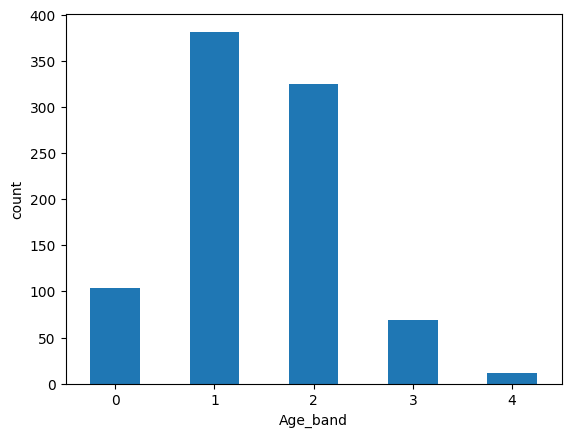

In [ ]:
df_copy['Age_band'].value_counts().sort_index().plot(kind='bar', rot=0, xlabel='Age_band',ylabel='count')

**Remarks**: Số lượng hành khách thuộc nhóm tuổi 16-32 chiếm số lượng lớn nhất.

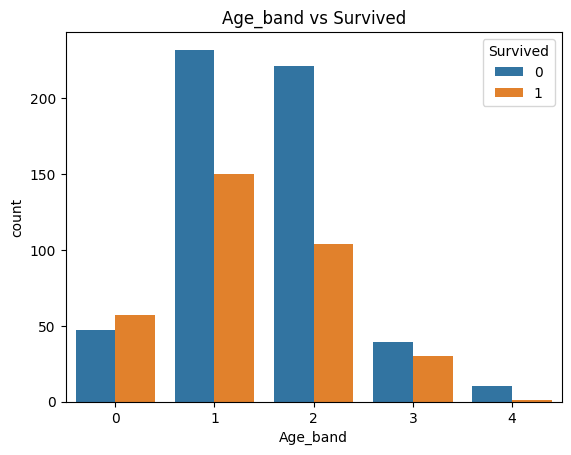

In [ ]:
# Tương quan giữa Age_band và Survived
sns.countplot(data=df_copy, x='Age_band', hue='Survived')
plt.title('Age_band vs Survived')
plt.xlabel('Age_band')
plt.ylabel('count')
plt.legend(title='Survived')
plt.show()

**Remarks**: Số lượng hành khách thuộc nhóm tuổi 16-32 có tỉ lệ sống sót cao nhất.

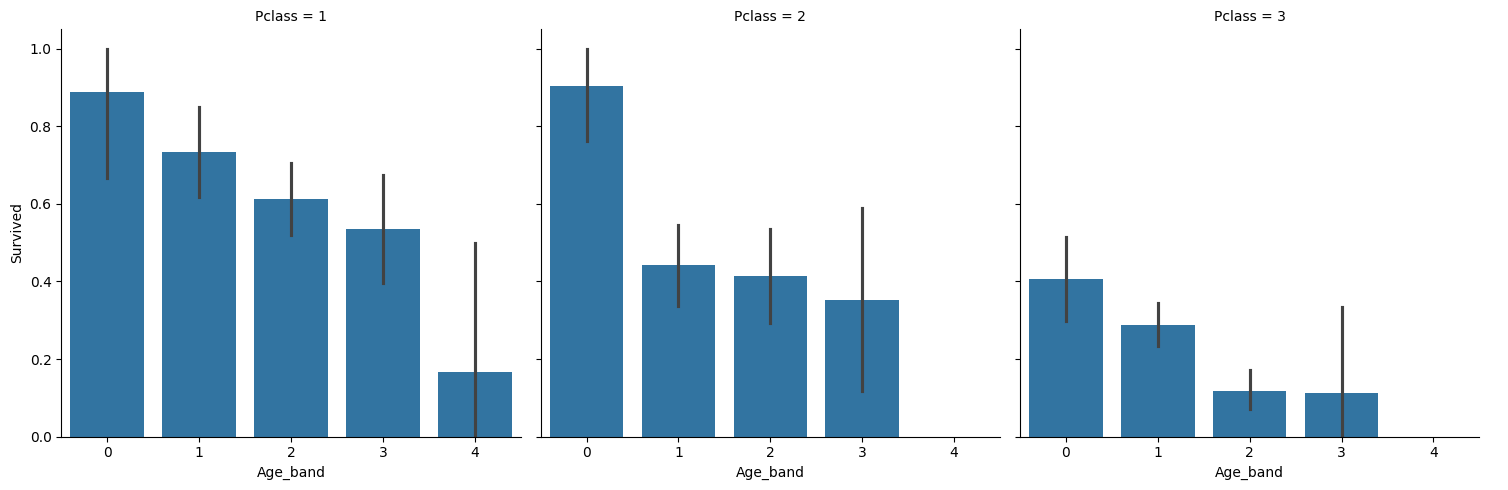

In [ ]:
# Tương quan giữa Age_band với Survived thông qua Pclass
sns.catplot(x='Age_band',y='Survived',data=df_copy,col='Pclass',kind='bar')
plt.show()

**Remarks:** Tỉ lệ sống sót giảm dần theo độ tuổi bất kể Hạng vé (Pclass) nào.

In [ ]:
# Fare_Range
# Chia đặc trưng Fare thành các khoảng nhỏ hơn để dễ mô hình hóa
# Chia 5 khoảng
df_copy['Fare_Range']=pd.qcut(df_copy['Fare'],4)
# Tính mean của mỗi khoảng
df_copy.groupby('Fare_Range')['Survived'].mean()

<ipython-input-73-794ec1cc39dd>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_copy.groupby('Fare_Range')['Survived'].mean()


,Survived
Fare_Range,
"(-0.001, 7.91]",0.197
"(7.91, 14.454]",0.304
"(14.454, 31.0]",0.455
"(31.0, 512.329]",0.581


In [ ]:
# Tạo đặc trưng Fare_cat để chuyển Fare thành giá trị phân loại
df_copy['Fare_cat']=0
df_copy.loc[df_copy['Fare']<=7.91,'Fare_cat']=0
df_copy.loc[(df_copy['Fare']>7.91)&(df_copy['Fare']<=14.454),'Fare_cat']=1
df_copy.loc[(df_copy['Fare']>14.454)&(df_copy['Fare']<=31),'Fare_cat']=2
df_copy.loc[(df_copy['Fare']>31)&(df_copy['Fare']<=513),'Fare_cat']=3

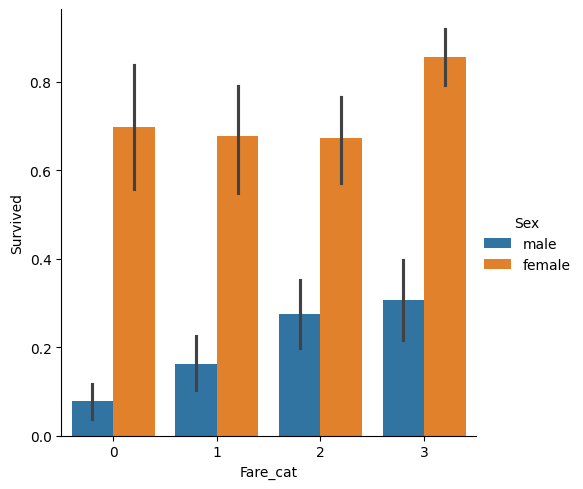

In [ ]:
# Tương quan giữa Fare_cat với Survived thông qua Sex
sns.catplot(x='Fare_cat',y='Survived',data=df_copy,hue='Sex',kind='bar')
plt.show()

**Remarks:** Giá vé càng tăng thì tỉ lệ sống sót càng cao ở giới tính nam, còn ở nữ thì giá vé tăng dần tới nhóm 2 thì tỉ lệ sống sót giảm dần, ở giá vé cao nhất tỉ lệ sống sót của nữ vẫn cao nhất.

## Chuyển dữ liệu dạng string thành numeric

Để mô hình học máy có thể xử lý dữ liệu hiệu quả, các đặc trưng phân loại như *Sex*, *Embarked* và *Honorific* cần được chuyển đổi thành dạng số. Một cách đơn giản là gán thủ công các giá trị này thành các số như 0, 1, 2,... Tuy nhiên, cách làm này dễ gây hiểu nhầm rằng các giá trị có quan hệ thứ bậc, tương tự như khi sử dụng mã hoá thứ bậc (ordinal encoding) — trong khi thực tế, các giá trị như 'male' và 'female' không mang tính thứ bậc rõ ràng (không thể nói 'male' > 'female' hoặc ngược lại).

Để tránh tạo ra sự sai lệch trong quá trình huấn luyện mô hình và giữ nguyên tính chất phân loại không thứ bậc của các đặc trưng này, ta sử dụng kỹ thuật one-hot encoding.

Ngược lại, *PClass* là một đặc trưng có thứ bậc tự nhiên (ordinal feature), nên việc áp dụng ordinal encoding là hợp lý. Tuy nhiên, trong dữ liệu gốc, *PClass* đã ở dạng số nên không cần mã hoá lại.

Tóm lại, ta sẽ áp dụng one-hot encoding cho các cột *Sex*, *Embarked* và *Honorific*.

In [ ]:
df_encoded = pd.get_dummies(df_copy, columns=['Sex', 'Embarked','Honorific'],prefix=['Sex', 'Embarked','Honorific'],dtype = int, drop_first=True)
print(df_encoded)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name    Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris 22.000      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th... 38.000      1      0   
2                               Heikkinen, Miss. Laina 26.000      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel) 35.000      1      0   
4                             Allen, Mr. William Henry 35.000      0      0   
..                                                 ...    ...    ... 

## Bỏ các đặc trưng không cần thiết

Các đặc trưng nên bỏ:
- Name: do không thể chuyển thành dạng phân loại nào.
- Age: do đã tạo đặc trưng Age_band nên không cần Age nữa.
- Ticket: do là những chuỗi ký tự bất kì không thể phân loại được.
- Fare: do đã có đặc trưng Fare_cat nên không cần nữa.
- Cabin: do có rất nhiều giá trị NaN và có nhiều hành khách có nhiều cabins khác nhau nên đặc trưng nào không có tác dụng gì.
- Fare_Range: do đã có đặc trưng Fare_cat.
- PassengerId: do không thể phân loại.

In [ ]:
# Drop these features
df_encoded.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
df_encoded

,Survived,Pclass,SibSp,Parch,Family_Size,Alone,Age_band,Fare_cat,Sex_male,Embarked_Q,Embarked_S,Honorific_Miss,Honorific_Mr,Honorific_Mrs,Honorific_Other
0,0,3,1,0,1,0,1,0,1,0,1,0,1,0,0
1,1,1,1,0,1,0,2,3,0,0,0,0,0,1,0
2,1,3,0,0,0,1,1,1,0,0,1,1,0,0,0
3,1,1,1,0,1,0,2,3,0,0,1,0,0,1,0
4,0,3,0,0,0,1,2,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,1,1,1,0,1,0,0,0,1
887,1,1,0,0,0,1,1,2,0,0,1,1,0,0,0
888,0,3,1,2,3,0,1,2,0,0,1,1,0,0,0
889,1,1,0,0,0,1,1,2,1,0,0,0,1,0,0


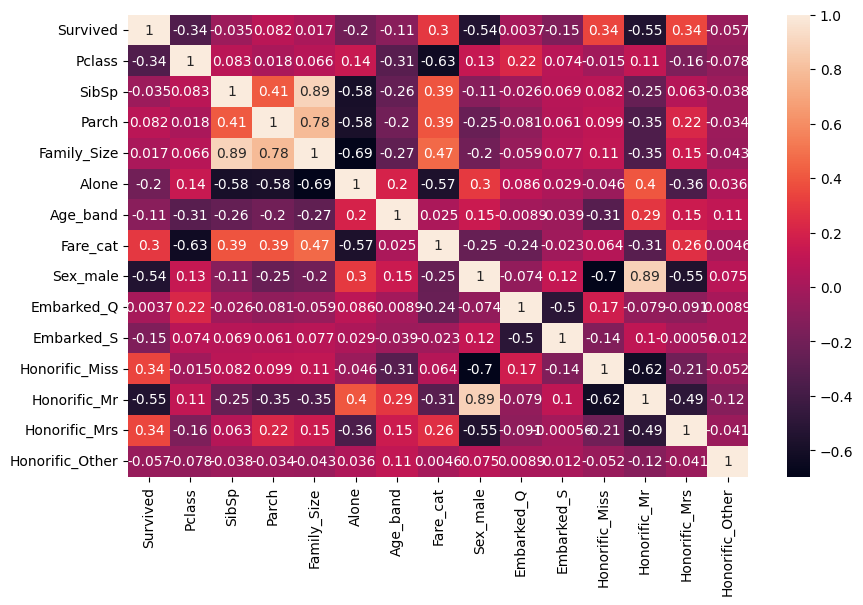

In [ ]:
# Plot correlation matrix in heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), ax=ax, annot=True)
plt.show()

**Remarks:**
Từ biểu đồ tương quan ở trên, có thể thấy một số đặc trưng có mối quan hệ dương (tương quan cùng chiều). Một vài đặc trưng là SibSp và Family_Size, Parch và Family_Size và một số đặc trưng có mối quan hệ âm (tương quan ngược chiều) như Alone và Family_Size.

# 🟢 5. Modeling (Mô hình hóa dữ liệu)

## 5.1. Phát triển mô hình và các đánh giá cơ bản

In [ ]:
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn import svm #support vector Machine
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Để dự đoán khả năng sống sót của hành khách, có thể sử dụng các mô hình sau:
1. **Logistic Regression**: là mô hình cơ bản và phổ biến trong các bài toán phân loại nhị phân, đặc biệt là với dữ liệu tuyến tính.

2. **Support Vector Machines (SVM) với kernal tuyến tính**: phù hợp với dữ liệu phân tách tuyến tính.

3. **Support Vector Machines (SVM) với kernal radial**: mạnh trong việc xử lý các bài toán phân loại phức tạp, đặc biệt với kernel radial basis function (RBF), phù hợp khi dữ liệu không tách biệt tuyến tính.

4. **Random Forest**: tập hợp nhiều cây quyết định, phù hợp với dữ liệu phi tuyến.

5. **K-Nearest Neighbours (KNN)**: mô hình đơn giản, hoạt động tốt khi dữ liệu có cấu trúc cụ thể và số lượng mẫu đủ lớn.

6. **Naive Bayes**: là mô hình xác suất dựa trên định lý Bayes, giả định các đặc trưng độc lập và tuân theo phân phối xác suất nào đó, hoạt động hiệu quả nếu dữ liệu thỏa mãn những giả định về phân phối hay mối quan hệ giữa biến đầu vào và biến đầu ra.

7. **Decision Tree**: phù hợp để phát hiện các mối quan hệ phi tuyến giữa đặc trưng và nhãn, đồng thời dễ trực quan hóa.

In [ ]:
train,test=train_test_split(df_encoded,test_size=0.2,random_state=0,stratify=df_encoded['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=df_encoded[df_encoded.columns[1:]]
Y=df_encoded['Survived']

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(train_X, train_Y)

# Random Forest
rf = RandomForestClassifier()
rf.fit(train_X, train_Y)

#SVM (linear)
ln_svm = svm.SVC(kernel='linear')
ln_svm.fit(train_X, train_Y)

#SVM (radial)
rd_svm = svm.SVC(kernel='rbf',C=1,gamma=0.1)
rd_svm.fit(train_X,train_Y)

#KNN
knn = KNeighborsClassifier()
knn.fit(train_X, train_Y)

#Navie Bayes
nb = GaussianNB()
nb.fit(train_X, train_Y)

#Decision tree
dt = DecisionTreeClassifier()
dt.fit(train_X, train_Y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

DecisionTreeClassifier()

In [ ]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"📊 Đánh giá mô hình: {name}")
    # Ensure y_test is in the correct format (numpy array or list)
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred):.3f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.3f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.3f}")


# Đánh giá từng mô hình
# Corrected variable name from X_test_scaled to test_X
evaluate_model("Logistic Regression", lr, test_X, test_Y)
evaluate_model("Random Forest", rf, test_X, test_Y)
evaluate_model("Linear SVM", ln_svm, test_X, test_Y)
evaluate_model("SVM (radial)",rd_svm, test_X, test_Y)
evaluate_model("K-Nearest Neighbors", knn, test_X, test_Y)
evaluate_model("Naive Bayes", nb, test_X, test_Y)
evaluate_model("Decision Tree", dt, test_X, test_Y)


📊 Đánh giá mô hình: Logistic Regression
Accuracy : 0.799
Precision: 0.770
Recall   : 0.681
F1 Score : 0.723
📊 Đánh giá mô hình: Random Forest
Accuracy : 0.771
Precision: 0.750
Recall   : 0.609
F1 Score : 0.672
📊 Đánh giá mô hình: Linear SVM
Accuracy : 0.804
Precision: 0.783
Recall   : 0.681
F1 Score : 0.729
📊 Đánh giá mô hình: SVM (radial)
Accuracy : 0.810
Precision: 0.797
Recall   : 0.681
F1 Score : 0.734
📊 Đánh giá mô hình: K-Nearest Neighbors
Accuracy : 0.793
Precision: 0.767
Recall   : 0.667
F1 Score : 0.713
📊 Đánh giá mô hình: Naive Bayes
Accuracy : 0.419
Precision: 0.398
Recall   : 0.986
F1 Score : 0.567
📊 Đánh giá mô hình: Decision Tree
Accuracy : 0.771
Precision: 0.750
Recall   : 0.609
F1 Score : 0.672


Vì dữ liệu mất cân bằng (imbalance), nên thay vì chỉ chia tập dữ liệu thành tập train và tập test, ta sử dụng *K-Fold Cross Validation*, giúp tận dụng tối đa dữ liệu, đồng thời đảm bảo mô hình được kiểm thử trên nhiều tập con khác nhau, giúp mô hình không bị thiên lệch quá mức về lớp chiếm đa số, nâng cao khả năng tổng quát hóa.

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [ ]:
kfold = KFold(n_splits=10, random_state=22, shuffle = True) # k=10, split the data into 10 equal parts
xyz=[]     ## Store the mean of accuracy of the model
accuracy=[] # Store all accuracy of a model ( kfold = 10)
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)

new_models_dataframe2


,CV Mean,Std
Linear Svm,0.819,0.055
Radial Svm,0.830,0.053
Logistic Regression,0.819,0.039
KNN,0.804,0.038
Decision Tree,0.805,0.044
Naive Bayes,0.773,0.138
Random Forest,0.810,0.047


<Axes: >

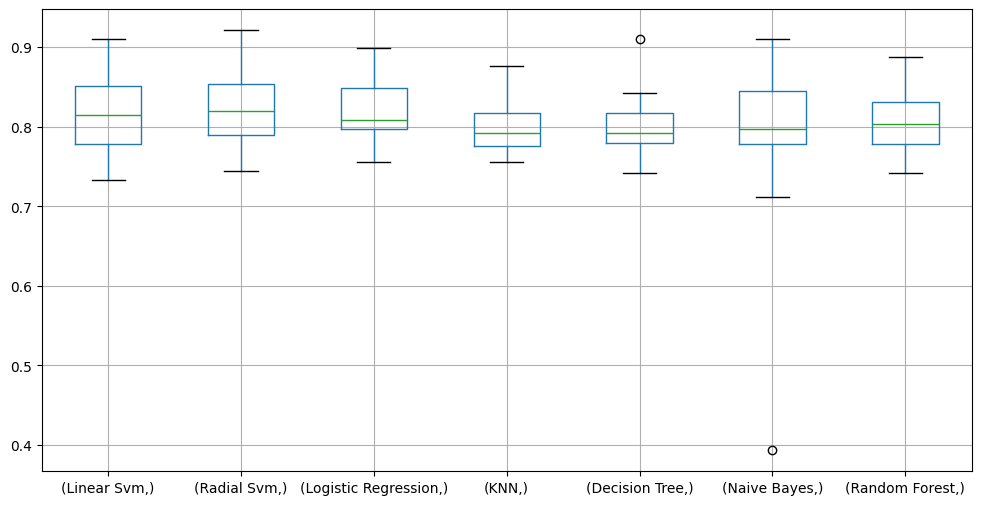

In [ ]:
## Distribution of the accuracy of each model
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

**Remarks**:

*   Radial SVM có trung bình giá trị Accuracy cao nhất, cho thấy đây là mô hình có hiệu suất cao nhất trong số các mô hình.
*   Logistic Regression tuy không có trung bình cao nhất, nhưng độ lệch chuẩn thấp, rất ổn định, có thể là một lựa chọn tốt nếu muốn mô hình đơn giản và dễ giải thích.
*   Random Forest có trung bình khá cao, độ lệch chuẩn, khá ổn định.
*  Naive Bayes có trung bình thấp nhất và độ lệch chuẩn cao nhất trong tất cả các mô hình và có outlier, chứng tỏ mô hình này hiệu quả thấp, kém ổn định.

**==> Next Action**: vì dữ liệu không cân bằng (imbalance), nên tuy chỉ số Accuracy phổ biến, nhưng không phản ánh đầy đủ hiệu quả của mô hình với từng lớp. Do đó, ta xét đến các chỉ số khác.

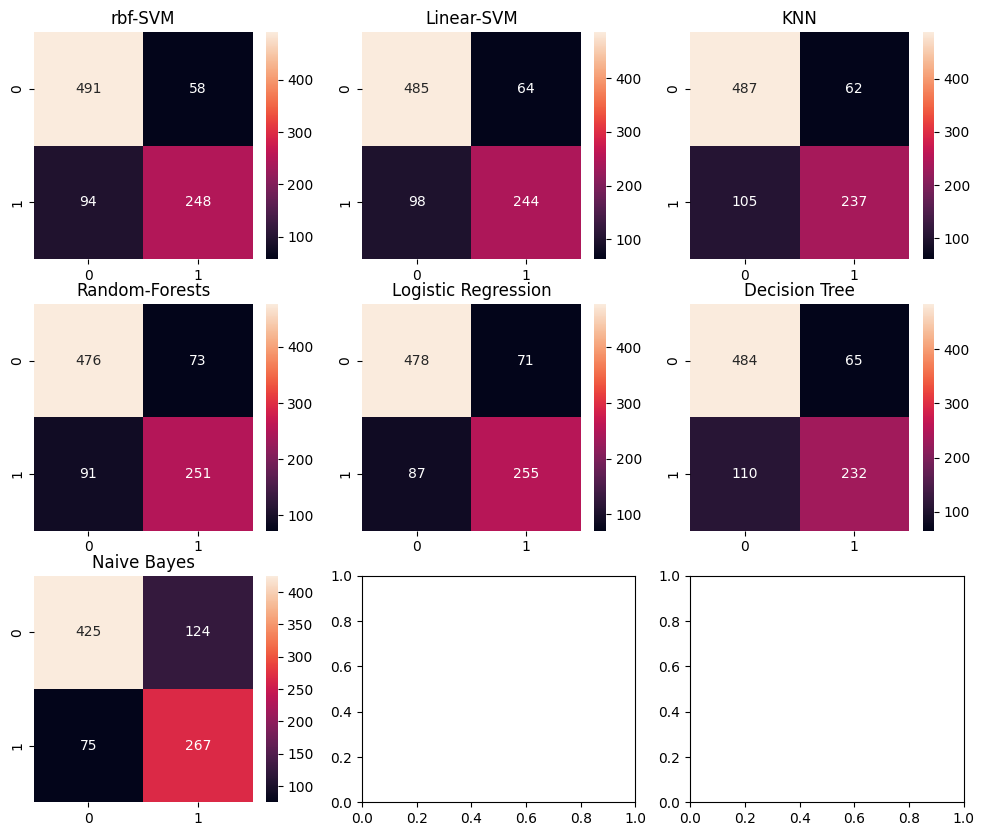

In [ ]:
from sklearn.metrics import confusion_matrix

f,ax=plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred_combined_dict = {}
for name, model in zip(classifiers, models):
    Y_pred_combined = cross_val_predict(model, X, Y, cv=kfold)
    print(f"📊 Đánh giá mô hình: {name}:")
    print(classification_report(Y, Y_pred_combined, target_names=['Not Survived','Survived']))
    print('-' * 40)
    y_pred_combined_dict[name] = Y_pred_combined

📊 Đánh giá mô hình: Linear Svm:
              precision    recall  f1-score   support

Not Survived       0.83      0.88      0.86       549
    Survived       0.79      0.72      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891

----------------------------------------
📊 Đánh giá mô hình: Radial Svm:
              precision    recall  f1-score   support

Not Survived       0.84      0.89      0.87       549
    Survived       0.81      0.73      0.77       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891

----------------------------------------
📊 Đánh giá mô hình: Logistic Regression:
              precision    recall  f1-score   support

Not Survived       0.84      0.87      0.86       549
    Survived       0.78      0.74      0.76       

###**Tiêu chí đánh giá các mô hình**

Đây là tập dữ liệu để đánh giá khả năng sống sót của một hành khách nào đó để có thể hỗ trợ cứu hộ, phân bổ nguồn lực cứu người. Do đó, cần chú ý các chỉ số sau đây:

1.  **Recall của lớp 'Survived'**: đây là tỷ lệ người thực sự sống sót mà mô hình dự đoán đúng. Trong bối cảnh cứu hộ, việc bỏ sót người sống (dự đoán là chết trong khi thực tế còn sống – sai lầm loại 2) là nghiêm trọng hơn so với việc dự đoán nhầm người chết là sống (sai lầm loại 1). Do đó, cần ưu tiên tối thiểu hóa False Negative, tương đương với việc tối đa hóa Recall của lớp 'Survived'.

2.  **F1-Score của lớp 'Survived'**: vì lớp 'Survived' là lớp quan trọng, chỉ số này giúp cân bằng vừa không bỏ sót người sống, vừa tránh cảnh báo sai (đoán nhầm người chết thành người sống) quá nhiều. Đây là chỉ số quan trọng khi cần kiểm soát cả hai loại sai lầm.

3.  **Weighted F1-Score**: là trung bình F1-score có trọng số theo số lượng mẫu của từng lớp. Chỉ số này cung cấp một cái nhìn tổng thể về mô hình, đặc biệt hữu ích khi so sánh nhiều mô hình khác nhau.

###**Đánh giá các mô hình**

1. Recall của lớp 'Survived' : Naive Bayes cao nhất với 77%, nghĩa là mô hình bỏ sót ít nhất các trường hợp thực sự sống sót. Theo sau là Logistic Regression (74%) và Radial SVM (73%).

3. F1-Score của lớp 'Survived': Radial SVM có F1-score cao nhất cho Survived (0.77), cho thấy sự cân bằng tốt giữa precision và recall.

4. Weighted Average F1-Score
- Radial SVM có chỉ số Weighted Average F1-Score cao nhất (0.83), chứng tỏ mô hình có hiệu suất tốt tổng thể trên cả 2 lớp.
- Ngược lại, Naive Bayes có chỉ số này thấp nhất.

**===> Về tổng thể**: kết hợp giữa phần đánh giá chỉ số Accuracy phía trên và các chỉ số vừa đánh giá
*   Radial SVM là mô hình hoạt động hiệu quả nhất, cân bằng tốt giữa Recall và Precision cho lớp quan trọng (Survived), đồng thời đạt hiệu suất cao tổng thể, nhưng tốn thời gian huấn luyện, có thể cần hiệu chỉnh siêu tham số.
*   Logistic Regression tuy đơn giản nhưng khá ổn định.
*   Naive Bayes tuy phát hiện nhiều người sống (Recall cho lớp 'Survived' cao) nhưng hiệu suất tổng thể không đáng tin cậy.

###==> **Đề xuất cải tiến mô hình:**

1. Hyper-parameters Tuning (Hiệu chỉnh siêu tham số)
2. Ensemble: kết hợp các  mô hình lại để tạo ra mô hình mạnh hơn, giảm sai số, tăng độ chính xác



## 5.2. Tối ưu hóa và cải tiến mô hình

### 5.2.1. Hyper Parameter Tuning (Hiệu chỉnh siêu tham số)

Hiệu chỉnh siêu tham số cho mô hình Radial SVM - mô hình thể hiện tiềm năng cao nhất trong những bước đánh giá trên.

Radial SVM có các siêu tham số:
*  C: điều chỉnh độ phạt đối với sai số (giữa underfitting và overfitting).
*   gamma: xác định phạm vi ảnh hưởng của một điểm dữ liệu.

In [ ]:
from sklearn.model_selection import GridSearchCV

C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1] # điều khiển độ phạt đối với sai số (độ phạt càng lớn thì mô hình càng dễ overfit)
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] # điều khiển độ ảnh hưởng của một điểm mẫu (nhỏ thì ảnh hưởng rộng, ít bị overfit; lớn thì ảnh hưởng cục bộ hơn, dễ overfit)
kernel=['rbf'] # Chỉ tuning trên kernel RBF (Radial SVM)
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,cv=10,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
0.8305368289637952
SVC(C=0.9, gamma=0.2)


**Remarks**:


*   Mô hình Radial SVM hoạt động tốt nhất khi C=0.9 và gamma=0.2 trên tập dữ liệu này với k = 10 trong K-Fold Cross Validation.
*   Accuracy trung bình đạt được là 83,05%.

==> Việc tuning không mang lại cải thiện lớn, nhưng cho thấy mô hình ban đầu đã hoạt động khá ổn định.



### 5.2.2. Ensembling


Ensembling là kỹ thuật kết hợp nhiều mô hình con thành một mô hình tổng để tăng tính ổn định và chính xác. 2 kỹ thuật Ensembling đơn giản nhất là:


*   **Voting Classifier**: kết hợp dự đoán của nhiều mô hình phân loại khác nhau. Mô hình tổng sẽ chọn nhãn được bỏ phiếu nhiều nhất (majority voting) hoặc tính trung bình xác suất dự đoán (soft voting) để đưa ra quyết định cuối cùng.
*   **Bagging (Bootstrap Aggregating)**: từ tập dữ liệu ban đầu, tạo ra nhiều tập dữ liệu con khác nhau bằng cách lấy mẫu ngẫu nhiên có lặp (bootstrap sampling), sau đó áp dùng cùng mô hình lên từng tập con đó, cuối cùng bỏ phiếu chọn nhãn (majority voting).



#### Voting Classifier

Từ mục tiêu ưu tiên recall của lớp "Survived", nhóm đề xuất sử dụng Soft Voting để kết hợp các mô hình sau:

*   Radial SVM: là mô hình cho hiệu suất tổng thể tốt nhất trên tập kiểm tra.\
*   Naive Bayes: đạt recall cao nhất đối với lớp "Survived", phù hợp với mục tiêu của bài toán.
*   Random Forest: là mô hình tổ hợp mạnh, có khả năng xử lý quan hệ phi tuyến.

Việc sử dụng Soft Voting cho phép tận dụng xác suất dự đoán của từng mô hình, từ đó cải thiện khả năng phát hiện đúng các trường hợp thuộc lớp "Survived", thay vì chỉ dựa trên đa số phiếu như Majority Voting. Điều này đặc biệt quan trọng khi các mô hình có độ mạnh khác nhau và khi bài toán ưu tiên giảm bỏ sót (false negatives).

📊 Đánh giá mô hình: Soft Voting (Radial SVM, Naive Bayes, Random Forest)
CV Mean Accuracy: 0.818
CV Accuracy Standard Deviation: 0.064
              precision    recall  f1-score   support

Not Survived       0.84      0.87      0.85       549
    Survived       0.77      0.74      0.76       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891



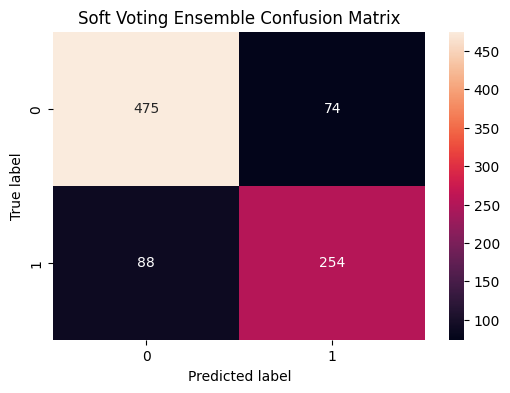

In [ ]:

from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Các mô hình lựa chọn để ensemble
clf1 = SVC(kernel='rbf', C=1, gamma=0.1, probability=True) # Radial SVM, probability=True để sử dụng soft voting vì Radial SVM không trả về xác suất
clf2 = GaussianNB() # Naive Bayes
clf3 = RandomForestClassifier(n_estimators=100, random_state=1) # Random Forest

# Voting Classifier
eclf1 = VotingClassifier(estimators=[('svm', clf1), ('gnb', clf2), ('rf', clf3)], voting='soft', weights=[1, 1, 1])

# Đánh giá mô hình
cv_result_ensemble = cross_val_score(eclf1, X, Y, cv=kfold, scoring="accuracy")
print(f"📊 Đánh giá mô hình: Soft Voting (Radial SVM, Naive Bayes, Random Forest)")
print(f"CV Mean Accuracy: {cv_result_ensemble.mean():.3f}")
print(f"CV Accuracy Standard Deviation: {cv_result_ensemble.std():.3f}")

y_pred_ensemble = cross_val_predict(eclf1, X, Y, cv=kfold)

print(classification_report(Y, y_pred_ensemble, target_names=['Not Survived', 'Survived']))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y, y_pred_ensemble), annot=True, fmt='2.0f')
plt.title('Soft Voting Ensemble Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


**Remarks**:
So với từng mô hình, Soft Voting khai thác được thế mạnh của từng mô hình tuy nhiên sự cải thiện nhưng không đáng kể thậm chí các chỉ số, tiêu chí đánh giá bị giảm nhẹ.

==> Việc soft voting không mang lại cải thiện hiệu quả, nhưng cho thấy mô hình ban đầu đã hoạt động khá ổn định.

#### Bagging


Bagging giúp giảm phương sai của mô hình, nên hiệu quả nhất khi áp dụng với các mô hình có phương sai cao. Do đó, nhóm lựa chọn sử dụng Bagging với các mô hình sau:
*   **K-Nearest Neighbor**: nhạy cảm với nhiễu và dữ liệu cụ thể, Bagging giúp tăng độ ổn định.
*   **Decision Tree**: dễ bị overfit và dao động lớn, Bagging giúp giảm sự biến động này.
*   **Random Forest**: là một kỹ thuật dựa trên Bagging và chọn ngẫu nhiên đặc trưng, giúp tăng cường tính đa dạng và ổn định cho các cây quyết định.










In [ ]:
from sklearn.ensemble import BaggingClassifier
# Define the base estimators for bagging
# Using KNeighborsClassifier, DecisionTreeClassifier, and RandomForestClassifier
knn_bagged = KNeighborsClassifier()
dt_bagged = DecisionTreeClassifier()
rf_bagged = RandomForestClassifier(n_estimators=100, random_state=1)

# Create Bagging Classifiers for each base estimator
# Changed base_estimator to estimator
bagged_knn = BaggingClassifier(estimator=knn_bagged, n_estimators=10, random_state=1)
bagged_dt = BaggingClassifier(estimator=dt_bagged, n_estimators=10, random_state=1)
bagged_rf = BaggingClassifier(estimator=rf_bagged, n_estimators=10, random_state=1)

# Evaluate each Bagging Classifier using cross-validation
bagged_knn_cv = cross_val_score(bagged_knn, X, Y, cv=kfold, scoring="accuracy")
bagged_dt_cv = cross_val_score(bagged_dt, X, Y, cv=kfold, scoring="accuracy")
bagged_rf_cv = cross_val_score(bagged_rf, X, Y, cv=kfold, scoring="accuracy")

print("📊 Đánh giá mô hình Bagging:")
print(f"Bagged KNN CV Mean Accuracy: {bagged_knn_cv.mean():.3f}")
print(f"Bagged Decision Tree CV Mean Accuracy: {bagged_dt_cv.mean():.3f}")
print(f"Bagged Random Forest CV Mean Accuracy: {bagged_rf_cv.mean():.3f}")

# Get cross-validated predictions and print classification reports for each bagging model
y_pred_bagged_knn = cross_val_predict(bagged_knn, X, Y, cv=kfold)
print("\n📊 Đánh giá mô hình: Bagged KNN")
print(classification_report(Y, y_pred_bagged_knn, target_names=['Not Survived', 'Survived']))
print('-' * 40)

y_pred_bagged_dt = cross_val_predict(bagged_dt, X, Y, cv=kfold)
print("\n📊 Đánh giá mô hình: Bagged Decision Tree")
print(classification_report(Y, y_pred_bagged_dt, target_names=['Not Survived', 'Survived']))
print('-' * 40)

y_pred_bagged_rf = cross_val_predict(bagged_rf, X, Y, cv=kfold)
print("\n📊 Đánh giá mô hình: Bagged Random Forest")
print(classification_report(Y, y_pred_bagged_rf, target_names=['Not Survived', 'Survived']))
print('-' * 40)

📊 Đánh giá mô hình Bagging:
Bagged KNN CV Mean Accuracy: 0.798
Bagged Decision Tree CV Mean Accuracy: 0.801
Bagged Random Forest CV Mean Accuracy: 0.813

📊 Đánh giá mô hình: Bagged KNN
              precision    recall  f1-score   support

Not Survived       0.81      0.87      0.84       549
    Survived       0.77      0.68      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891

----------------------------------------

📊 Đánh giá mô hình: Bagged Decision Tree
              precision    recall  f1-score   support

Not Survived       0.82      0.86      0.84       549
    Survived       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891

----------------------------------------

📊 Đánh giá mô hình: Bagged Random Fo

**Remarks**:

* Mô hình Bagged KNN: việc bagging không hiệu quả khi các tiêu chí đánh giá đều giảm, đặc biệt là recall của lớp Survived --> đi ngược với mục tiêu ban đầu là tăng recall
* Mô hình Bagged Random Forest và Bagged Decision Tree: cả 2 mô hình này đạt hiệu quả như mong đợi sau khi bagging, các chỉ số, tiêu chí đánh giá đều giữ ổn định, hoặc tăng, tuy nhiên cũng không có sự cải thiện đáng kể so với mô hình ban đầu.

==> Bagging hoạt động tốt với các mô hình có phương sai lớn hơn, dao động hơn, phụ thuộc vào tính đa dạng và chất lượng của các mô hình con. Việc bagging cho mô hình không cải thiện đáng kể, điều này có thể xuất phát từ việc mô hình ban đầu đã hoạt động ổn định.

###Feature Importance

Đánh giá mức độ quan trọng của các thuộc tính đối với các mô hình

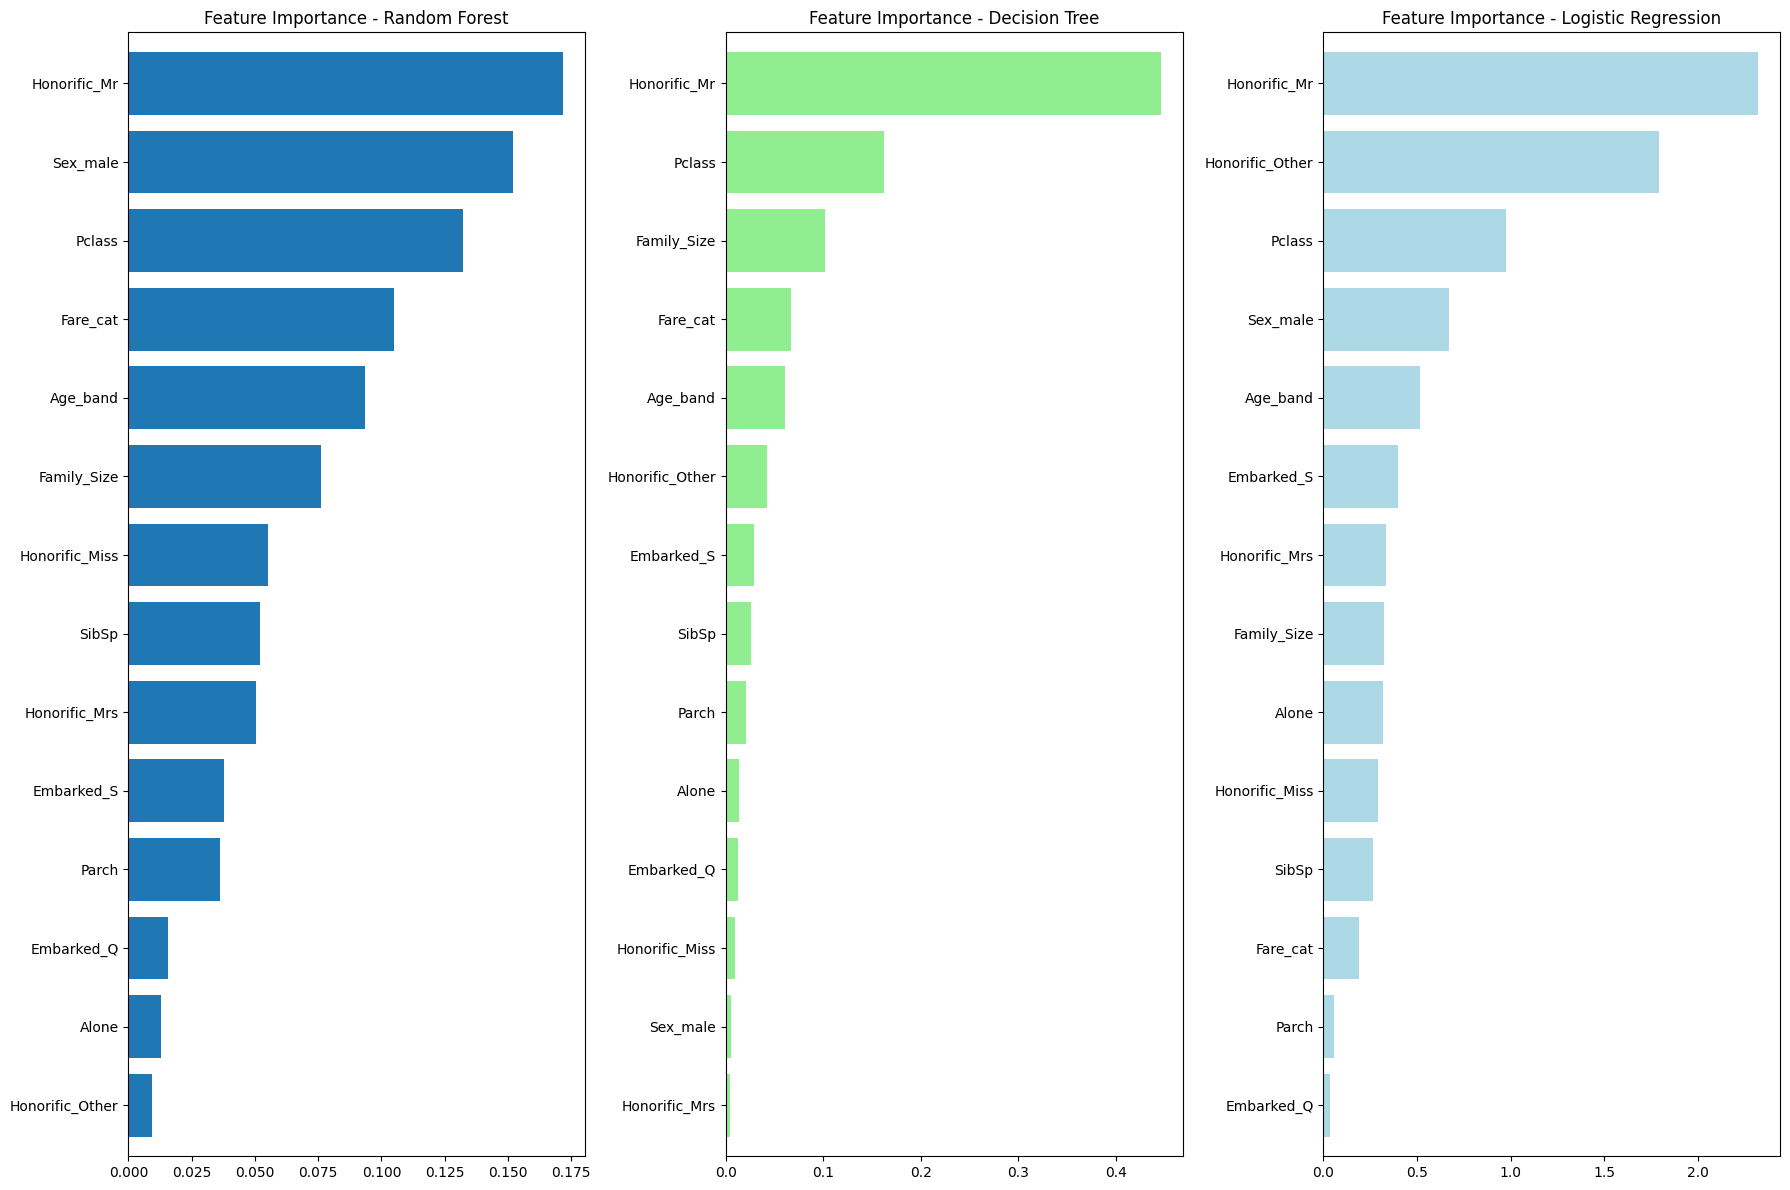

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
f, ax = plt.subplots(1, 3, figsize=(18, 12))
# Random Forest
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
# Truy cập Axes đầu tiên bằng index 0
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(
    width=0.8, ax=ax[0])
ax[0].set_title('Feature Importance - Random Forest')

# Decision Tree
model = DecisionTreeClassifier(random_state=0)
model.fit(X, Y)
# Truy cập Axes thứ hai bằng index 1
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(
    width=0.8, ax=ax[1], color='lightgreen')
ax[1].set_title('Feature Importance - Decision Tree')

# Logistic Regression (dùng trị tuyệt đối của hệ số)
model = LogisticRegression(max_iter=1000)
model.fit(X, Y)
importance = pd.Series(abs(model.coef_[0]), X.columns).sort_values(ascending=True)
# Truy cập Axes thứ ba bằng index 2
importance.plot.barh(width=0.8, ax=ax[2], color='lightblue')
ax[2].set_title('Feature Importance - Logistic Regression')

plt.tight_layout()
plt.show()

**REMARKS**

Từ đánh giá một số đặc trưng quan trọng trong các mô hình phân loại như Logistic Regression, Random Forests và Decision Tree, nhóm rút ra một số kết luận mở rộng như sau:
1. Một số đặc trưng quan trọng phổ biến ảnh hưởng nhiều đến kết quả mô hình là: Honorific_Mr, Sex_male, Pclass, Fare_cat, Age_band và Family_size
2. Đáng chú ý, biến Honorific_Mr nằm vị trí đầu bảng trong cả 3 mô hình. Điều này có thể được lý giải bởi số lượng hành khách là nam chiếm phần lớn. Do đó, mặc dù biến giới tính không nằm vị trí hàng đầu, nhưng thông qua các biến danh xưng, mức độ đóng góp quan trọng của yếu tố giới tính vẫn được thể hiện rõ trong các mô hình.
3. Tương tự, Pclass và Fare_cat thể hiện địa vị của hành khách (ảnh hưởng tới tỷ lệ sống sót) và Age_band cũng đóng vai trò không kém phần quan trọng tới tỷ lệ sống sót của hành khách và  Family_Size, SibSp, Parch, Alone đều có liên quan đến nhau vì vậy ưu tiên Family_size để tránh đa cộng tuyến.


# 🟢 6. KẾT LUẬN


* **Tổng quan**: sau khi thử nhiều kĩ thuật cải thiện mô hình khác nhau, nhóm nhận thấy rằng tất cả mô hình đều hoạt động khá ổn định. Việc áp dụng các kỹ thuật cải tiến (Hyper Parameter Tuning và Ensembling) trong trường hợp này không mang lại cải thiện đáng kể về hiệu suất.

* **Các yếu tố ảnh hưởng đến kết quả phân loại**: Ngay từ quá trình EDA đến tiền xử lý dữ liệu, nhóm đã phân tích từng thuộc tính, và xác định những mối tương quan có thể ảnh hưởng đến kết quả phân loại cũng như thêm/bớt các feature để tăng hiệu quả cho mô hình.

--> Kết quả cho thấy rằng các features đều hoạt động tốt với vai trò của mình, đặc biệt các features được thêm vào như Honorific (nói chung), Family_size, Age_band có tầm ảnh hưởng đáng kể đến kết quả phân loại, phản ánh đúng thực tế.

* **Đánh giá mô hình**: Radial SVM nổi bật nhất về tính hiệu quả và độ ổn định. Trong khi đó, Logistic Regression, dù là mô hình đơn giản, vẫn có hiệu suất khá tốt.

--> Ưu tiên sử dụng 2 mô hình này để giải quyết bài toán.

**Hướng mở rộng**:


*   Khai thác mô hình nâng cao hơn: Thử nghiệm với các mô hình mạnh hơn như XGBoost, LightGBM, hoặc mô hình deep learning nếu có đủ dữ liệu và tài nguyên.
*   Xem xét khả năng triển khai thực tế: giả định nếu có tai nạn tàu hiện đại, cần xem xét liệu mô hình hiện tại còn phù hợp không. Việc này đòi hỏi bổ sung thêm các features đầu vào (ví dụ như loại tàu, hệ thống điều khiển, dữ liệu cảm biến thời gian thực,...) và thường xuyên cập nhật và tái huấn luyện mô hình để đảm bảo khả năng thích ứng với những thay đổi trong thực tế.



**Kết luận**: Qua quá trình xây dựng, cải tiến và phân tích, nhóm không chỉ rút ra được mô hình phù hợp mà còn hiểu rõ hơn về dữ liệu và những yếu tố ảnh hưởng đến kết quả phân loại. Dù mô hình chưa đạt được sự cải thiện vượt trội từ các kỹ thuật nâng cao, nhưng điều đó cũng cho thấy rằng các bước xử lý ban đầu và lựa chọn mô hình cơ bản của nhóm đã khá hợp lý và hiệu quả. Đây là tiền đề tốt để phát triển các bài toán phân tích tương tự trong tương lai.


